<a href="https://colab.research.google.com/github/Elahemirzakhani/kidney-disease-data-mining/blob/main/DM_final_Phase_MahsaQeytasi%2BElaheMirzakhani_1401107_V11_R1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IN THE NAME OF GOD

#### Dr.Tooktam Khatibi

#### Elahe Mirzakhani- Mahsa Gheytasi

##### School of Indusrtrial Engineering
##### Health Care System Engineering

![download.png](attachment:download.png)

# Data defining

The data was taken over a 2-month period in India with 25 features ( eg, red blood cell count, white blood cell count, etc).

The target is the 'classification', which is either 'ckd' or 'notckd' - ckd=chronic kidney disease. Use machine learning techniques to predict if a patient is suffering from a chronic kidney disease or not.


Credit goes to Mansoor Iqbal (https://www.kaggle.com/mansoordaku) from where the dataset has been collected. For the purpose of creating a challenge, certain modifications have been done to the dataset.
Original dataset can be acquired from the link Chronic KIdney Disease (https://www.kaggle.com/mansoordaku/ckdisease)

Dataset is a classification problem and has sevral feartures and one class which predict a patient is suffering from a chronic kidney disease or not.


# Attribute information

![Screenshot%20%2850%29.png](attachment:Screenshot%20%2850%29.png)

# Import libraries

For starting first call libreries .

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
kd=pd.read_csv("/content/drive/MyDrive/KIDNEY.csv")
kd

age  bp     sg al su  rbc  pc  pcc  ba  bgr  ... pcv  wbcc rbcc htn dm  \
0    48  80   1.02  1  0    0   0    1   1  121  ...  44  7800  5.2   0  0   
1     7  50   1.02  4  0    0   0    1   1    ?  ...  38  6000  0.0   1  1   
2    62  80   1.01  2  3    0   0    1   1  423  ...  31  7500  0.0   1  0   
3    48  70  1.005  4  0    0   1    0   1  117  ...  32  6700  3.9   0  1   
4    51  80   1.01  2  0    0   0    1   1  106  ...  35  7300  4.6   1  1   
..   ..  ..    ... .. ..  ...  ..  ...  ..  ...  ...  ..   ...  ...  .. ..   
395  55  80   1.02  0  0    0   0    1   1  140  ...  47  6700  4.9   1  1   
396  42  70  1.025  0  0    0   0    1   1   75  ...  54  7800  6.2   1  1   
397  12  80   1.02  0  0    0   0    1   1  100  ...  49  6600  5.4   1  1   
398  17  60  1.025  0  0    0   0    1   1  114  ...  51  7200  5.9   1  1   
399  58  80  1.025  0  0    0   0    1   1  131  ...  53  6800  6.1   1  1   

     cad  appet  pe  ane   class  
0      1      1   1    1     ckd  
1      1      1   1    1     ckd  
2      1      0   1    0     ckd  
3      1      0   0    0     ckd  
4      1      1   1    1     ckd  
..   ...    ...  ..  ...     ...  
395    1      1   1    1  notckd  
396    1      1   1    1  notckd  
397    1      1   1    1  notckd  
398    1      1   1    1  notckd  
399    1      1   1    1  notckd  

[400 rows x 25 columns]

We chose "kd" as an abrriviation of kydney.

# Describing the data

In [ ]:
kd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    object 
 1   bp      400 non-null    object 
 2   sg      400 non-null    object 
 3   al      400 non-null    object 
 4   su      400 non-null    object 
 5   rbc     400 non-null    int64  
 6   pc      400 non-null    int64  
 7   pcc     400 non-null    int64  
 8   ba      400 non-null    int64  
 9   bgr     400 non-null    object 
 10  bu      400 non-null    object 
 11  sc      400 non-null    object 
 12  sod     400 non-null    object 
 13  pot     400 non-null    object 
 14  hemo    400 non-null    object 
 15  pcv     400 non-null    int64  
 16  wbcc    400 non-null    int64  
 17  rbcc    400 non-null    float64
 18  htn     400 non-null    int64  
 19  dm      400 non-null    int64  
 20  cad     400 non-null    int64  
 21  appet   400 non-null    int64  
 22  pe

We see some features are nominal whereas they are numerical.( we should consider this and change them)

In [ ]:
kd["age"]=pd.to_numeric(kd["age"],errors="coerce")
kd["bp"]=pd.to_numeric(kd["bp"],errors="coerce")
kd["sg"]=pd.to_numeric(kd["sg"],errors="coerce")
kd["su"]=pd.to_numeric(kd["su"],errors="coerce")
kd["al"]=pd.to_numeric(kd["al"],errors="coerce")
kd["bgr"]=pd.to_numeric(kd["bgr"],errors="coerce")
kd["bu"]=pd.to_numeric(kd["bu"],errors="coerce")
kd["sc"]=pd.to_numeric(kd["sc"],errors="coerce")
kd["sod"]=pd.to_numeric(kd["sod"],errors="coerce")
kd["pot"]=pd.to_numeric(kd["pot"],errors="coerce")
kd["hemo"]=pd.to_numeric(kd["hemo"],errors="coerce")

In [ ]:
kd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     400 non-null    int64  
 6   pc      400 non-null    int64  
 7   pcc     400 non-null    int64  
 8   ba      400 non-null    int64  
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     400 non-null    int64  
 16  wbcc    400 non-null    int64  
 17  rbcc    400 non-null    float64
 18  htn     400 non-null    int64  
 19  dm      400 non-null    int64  
 20  cad     400 non-null    int64  
 21  appet   400 non-null    int64  
 22  pe

Ok they are all set.

In [ ]:
kd.describe()

age          bp          sg          al          su         rbc  \
count  391.000000  388.000000  353.000000  354.000000  351.000000  400.000000   
mean    51.483376   76.469072    1.017408    1.016949    0.450142    0.117500   
std     17.169714   13.683637    0.005717    1.352679    1.099191    0.322418   
min      2.000000   50.000000    1.005000    0.000000    0.000000    0.000000   
25%     42.000000   70.000000    1.010000    0.000000    0.000000    0.000000   
50%     55.000000   80.000000    1.020000    0.000000    0.000000    0.000000   
75%     64.500000   80.000000    1.020000    2.000000    0.000000    0.000000   
max     90.000000  180.000000    1.025000    5.000000    5.000000    1.000000   

               pc         pcc          ba         bgr  ...        hemo  \
count  400.000000  400.000000  400.000000  356.000000  ...  348.000000   
mean     0.190000    0.885000    0.935000  148.036517  ...   12.526437   
std      0.392792    0.319421    0.246835   79.281714  ...    2.912587   
min      0.000000    0.000000    0.000000   22.000000  ...    3.100000   
25%      0.000000    1.000000    1.000000   99.000000  ...   10.300000   
50%      0.000000    1.000000    1.000000  121.000000  ...   12.650000   
75%      0.000000    1.000000    1.000000  163.000000  ...   15.000000   
max      1.000000    1.000000    1.000000  490.000000  ...   17.800000   

              pcv          wbcc       rbcc         htn          dm  \
count  400.000000    400.000000  400.00000  400.000000  400.000000   
mean    31.982500   6178.500000    3.16575    0.627500    0.645000   
std     16.962799   4490.489839    2.36621    0.484076    0.479113   
min      0.000000      0.000000    0.00000    0.000000    0.000000   
25%     26.000000      0.000000    0.00000    0.000000    0.000000   
50%     37.000000   6900.000000    4.00000    1.000000    1.000000   
75%     44.000000   9400.000000    5.10000    1.000000    1.000000   
max     54.000000  26400.000000    8.00000    1.000000    1.000000   

              cad       appet          pe         ane  
count  400.000000  400.000000  400.000000  400.000000  
mean     0.905000    0.792500    0.807500    0.847500  
std      0.293582    0.406024    0.394757    0.359955  
min      0.000000    0.000000    0.000000    0.000000  
25%      1.000000    1.000000    1.000000    1.000000  
50%      1.000000    1.000000    1.000000    1.000000  
75%      1.000000    1.000000    1.000000    1.000000  
max      1.000000    1.000000    1.000000    1.000000  

[8 rows x 24 columns]

This gives us more information about mean max and numbers of each column.

In [ ]:
kd.shape

(400, 25)

we have 400 instances and 25 features.

In [ ]:
kd.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

'age', 'bp', 'sg', 'al' ,etc. are our input features and 'class' is output.

---



In [ ]:
kd["class"].value_counts()

ckd       250
notckd    150
Name: class, dtype: int64

250 of records are ckd(which means they have chronical kidney disease) and 150  don't have chronical kidney disease.

In [ ]:
pd.crosstab(kd['class'], kd['age'])

age     2.0   3.0   4.0   5.0   6.0   7.0   8.0   11.0  12.0  14.0  ...  74.0  \
class                                                               ...         
ckd        1     1     1     2     1     1     3     1     1     1  ...     2   
notckd     0     0     0     0     0     0     0     0     1     0  ...     1   

age     75.0  76.0  78.0  79.0  80.0  81.0  82.0  83.0  90.0  
class                                                         
ckd        3     5     1     0     2     1     1     1     1  
notckd     2     0     0     1     2     0     0     0     0  

[2 rows x 76 columns]

In [ ]:
pd.crosstab(kd['rbc'], kd['class']).style.background_gradient(cmap='gist_heat')

People who have abnormal Red blood cell(rbc) (0), are the most diasposal people to get disease.

In [ ]:
pd.crosstab(kd['pc'], kd['class']).style.background_gradient(cmap='copper')

People who have abnormal Pus Cell(pc) (0), are the most diasposal people to get disease.

In [ ]:
pd.crosstab(kd['htn'], kd['class']).style.background_gradient(cmap='Greens')

People who have  Hypertension(htn) (0), are the most diasposal people to get disease.

In [ ]:
pd.crosstab(kd['dm'], kd['class']).style.background_gradient(axis=None, cmap='afmhot')

Like Hypertension, Diabetes Mellitus has the same result.

In [ ]:
pd.crosstab(kd['cad'], kd['class']).style.background_gradient(cmap='Wistia')

Coronary Artery Disease (cad) can't be a serious matter in getting disease.

In [ ]:
pd.crosstab(kd['pe'], kd['class']).style.background_gradient(cmap='cool')

Pedal Edema has the same result .

In [ ]:
pd.crosstab(kd['ane'], kd['class']).style.background_gradient(cmap='coolwarm')

Anemia does not effect on getting chronical kidney disease.

#Visualization

In [ ]:
# plotting number of sich people based on age
sns.catplot(data = kd, x = 'age', kind = 'count', col = 'class')

It says older people are more susceptible to get this disease than the younger ones.

In [ ]:
sns.displot(kd, x="age", hue='class', kind="kde", fill = True, legend = False)

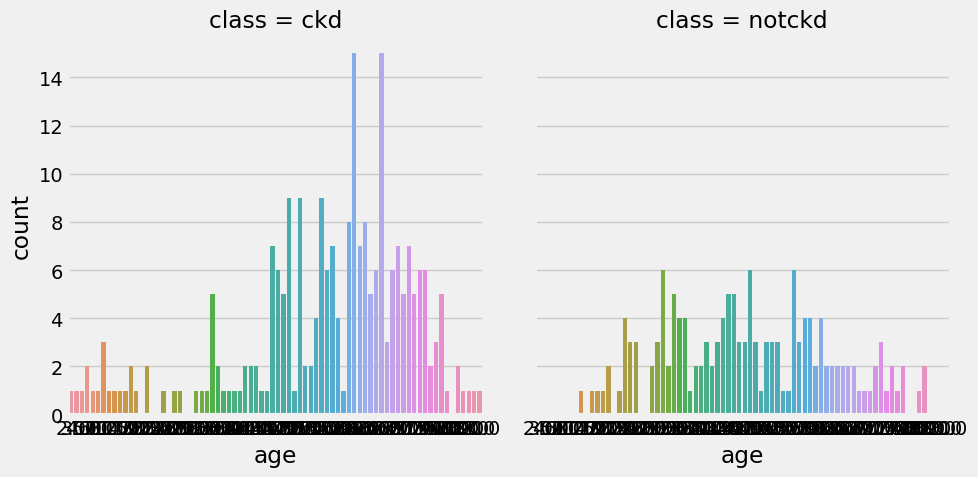

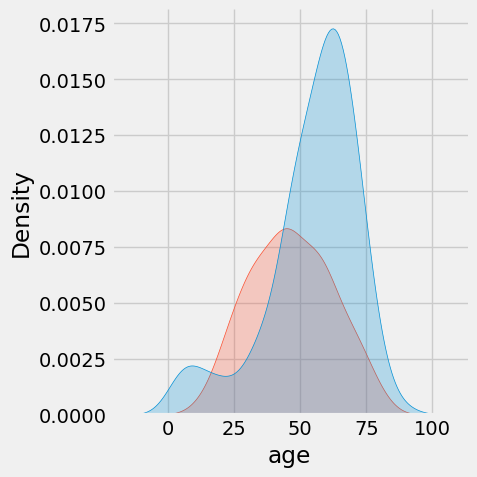

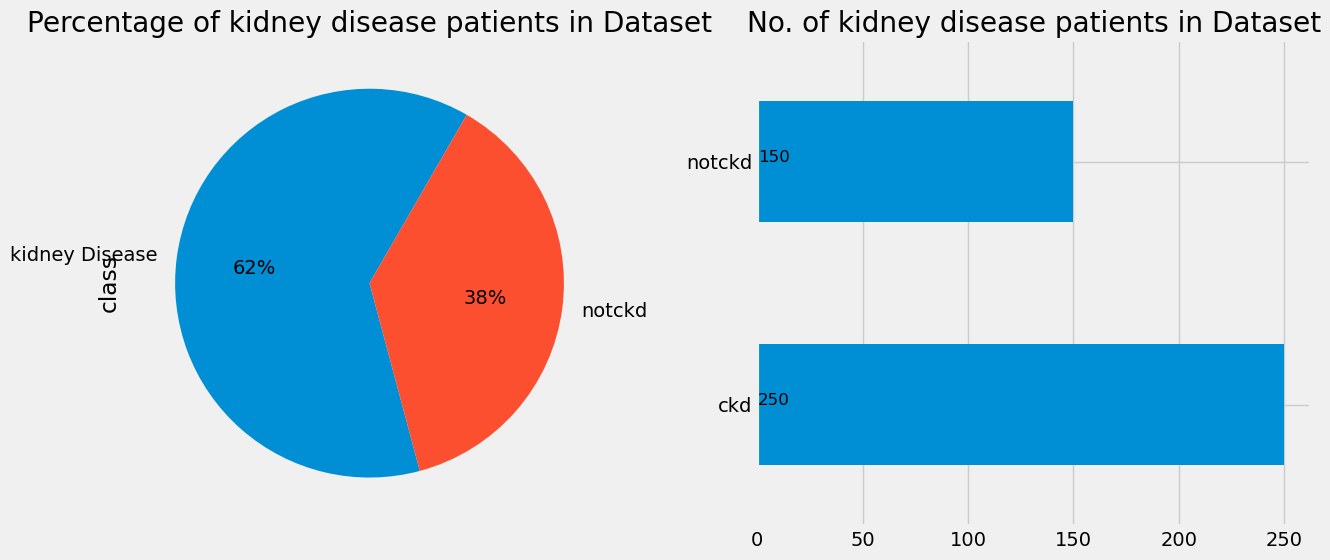

In [ ]:
# percentage & count of patients
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = kd['class'].value_counts().plot.pie( x="Kidnet disease" ,y ='no.of patients',
                   autopct = "%1.0f%%",labels=["kidney Disease","notckd"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of kidney disease patients in Dataset')
ax2 = kd["class"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(kd["class"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'No. of kidney disease patients in Dataset')
plt.show()

Number of poople with kidney disease is less than the people whitout it.

In [ ]:
# effect bp on age and getting disease
sns.scatterplot(x = 'age', y = 'bp', hue = 'class', data =kd)

<AxesSubplot:xlabel='age', ylabel='bp'>

plot shows that as you get older your blood pressure will increase so you are more susceptible to kidney disease.

In [ ]:
# effect bgr on age
sns.histplot(data=kd, x="age",y="bgr", kde=True, color="mediumspringgreen")

<AxesSubplot:xlabel='age', ylabel='bp'>

As getting older, blood gloucose increase.

In [ ]:
# effect hemo on age and getting disease
sns.histplot(data=kd, x="age",y="hemo",hue="class", kde=True, color="blue")

<AxesSubplot:xlabel='age', ylabel='bp'>

Nmber of hemoglobin in people without kidney disease is less than people with kidney disease.

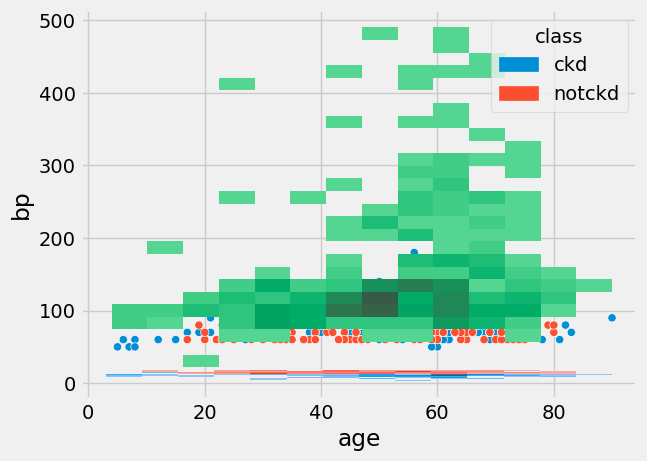

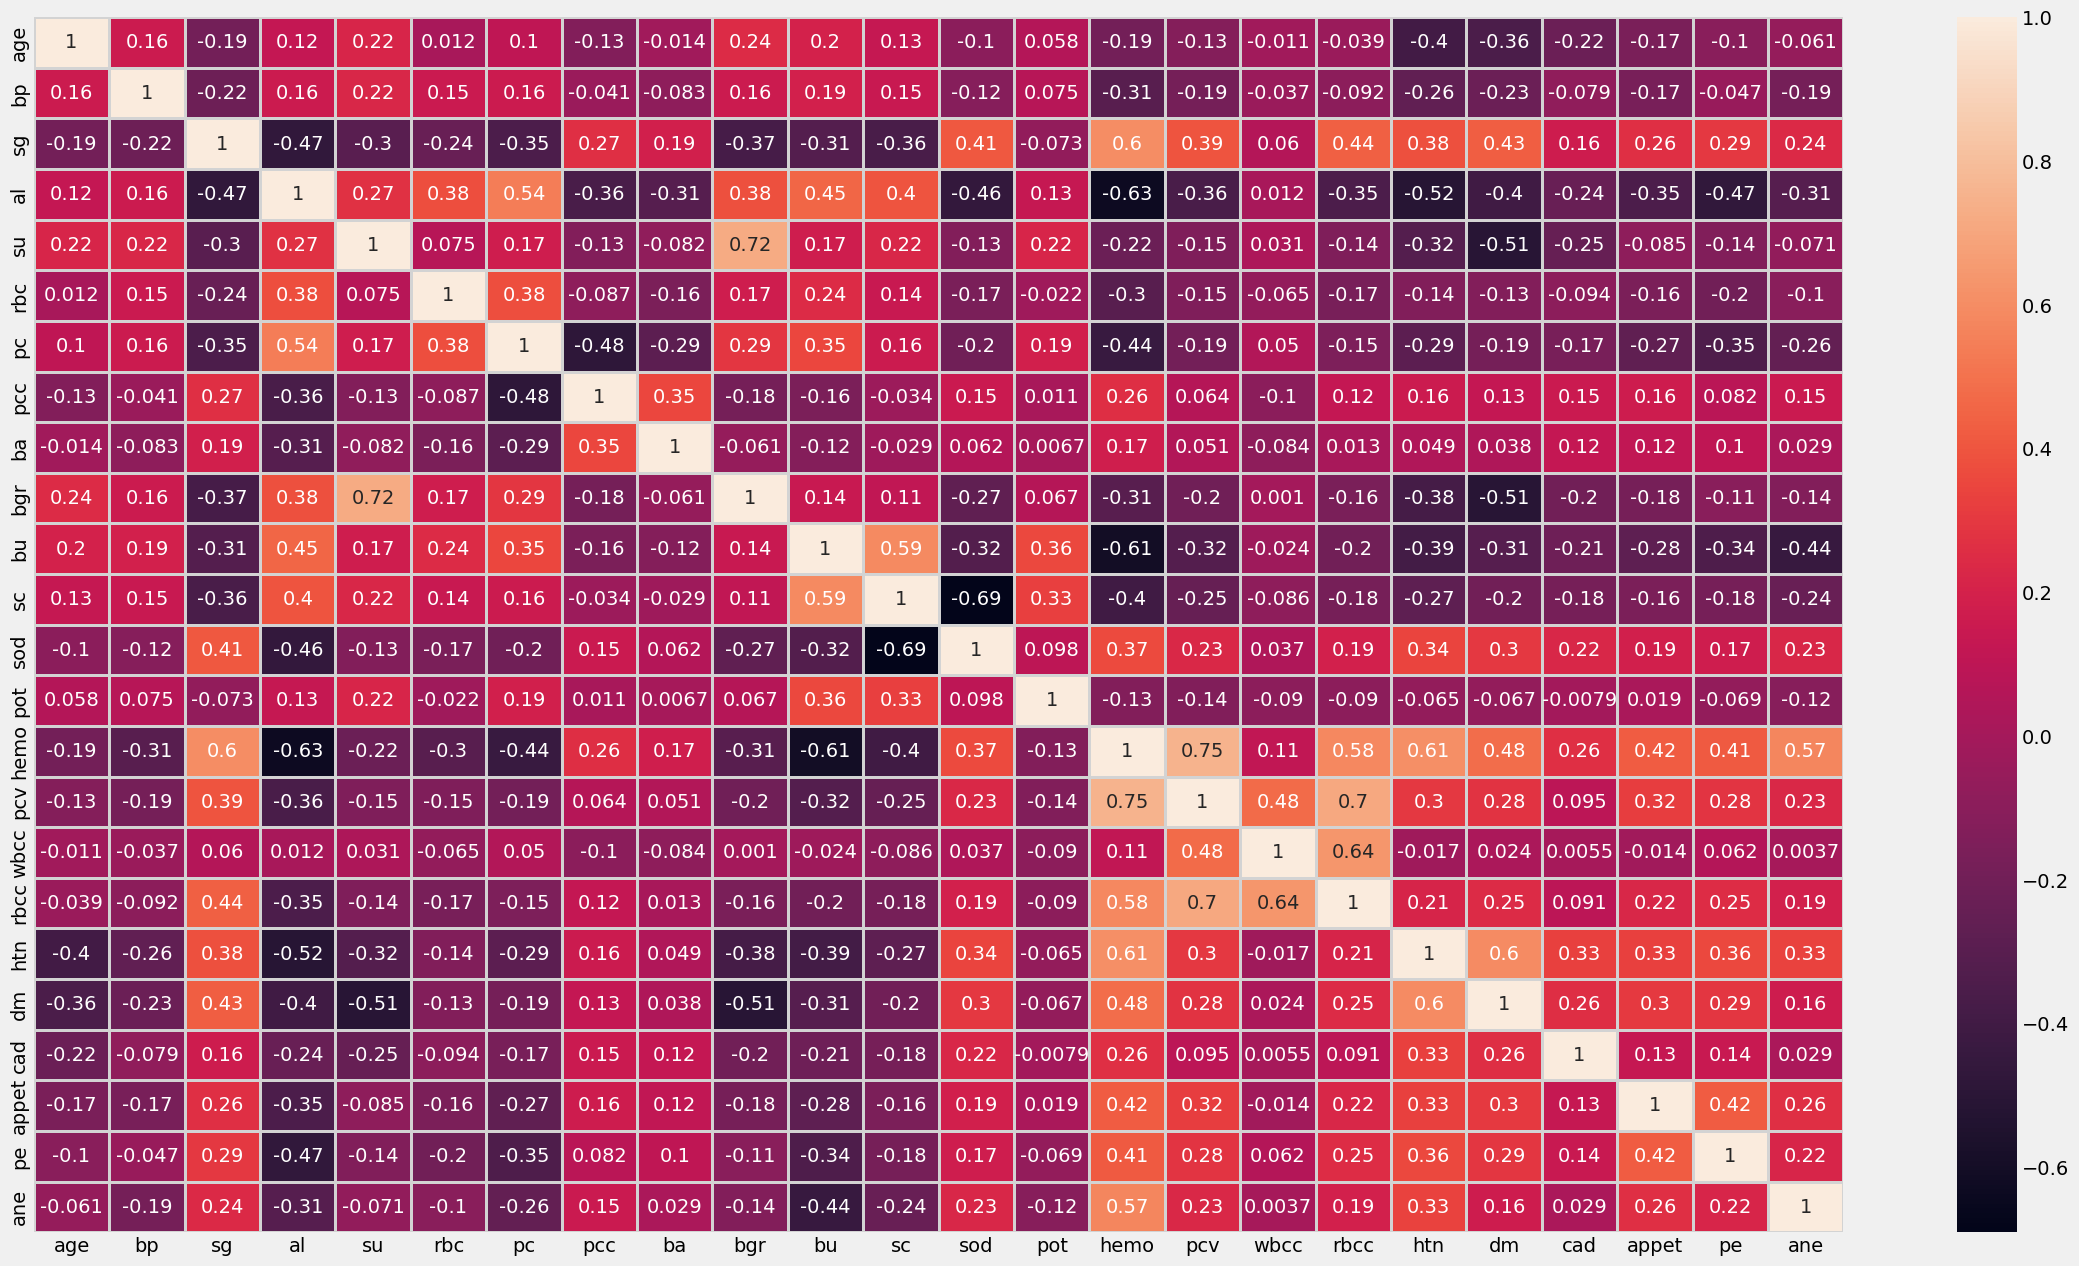

In [ ]:
# heatmap of data

plt.figure(figsize = (26,15))

sns.heatmap(kd.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

There is a strong correlation between 'hemo', 'sg', 'pcv', 'rbcc', 'htn', 'dm', 'al... for furthur undrestanding we will use correlation map.

In [ ]:
gg = sns.pairplot(kd, vars =['age','hemo', 'sg', 'pcv', 'rbcc', 'htn', 'dm', 'al'],hue = 'class')
gg.map_diag(sns.distplot)
gg.add_legend()
gg.fig.suptitle('FacetGrid plot', fontsize = 10)
gg.fig.subplots_adjust(top= 1);

For majority of the attributes, we do observe similar peaks between patients with chronic kidney disease and healthy individuals.

# PreProcessing

## Inplace nominal to numerical

In [ ]:
kd['class'].replace(['ckd', 'notckd'],
                        [0, 1], inplace=True)
kd.head()

age    bp     sg   al   su  rbc  pc  pcc  ba    bgr  ...  pcv  wbcc  rbcc  \
0  48.0  80.0  1.020  1.0  0.0    0   0    1   1  121.0  ...   44  7800   5.2   
1   7.0  50.0  1.020  4.0  0.0    0   0    1   1    NaN  ...   38  6000   0.0   
2  62.0  80.0  1.010  2.0  3.0    0   0    1   1  423.0  ...   31  7500   0.0   
3  48.0  70.0  1.005  4.0  0.0    0   1    0   1  117.0  ...   32  6700   3.9   
4  51.0  80.0  1.010  2.0  0.0    0   0    1   1  106.0  ...   35  7300   4.6   

   htn  dm  cad  appet  pe  ane  class  
0    0   0    1      1   1    1      0  
1    1   1    1      1   1    1      0  
2    1   0    1      0   1    0      0  
3    0   1    1      0   0    0      0  
4    1   1    1      1   1    1      0  

[5 rows x 25 columns]

## Outliers

### Searching for outliers

In [ ]:
kd.shape

(400, 25)

In [ ]:
kd.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [ ]:
def plot_boxplot(kd,ft):
    kd.boxplot(column = [ft])
    plt.grid(False)
    plt.show()

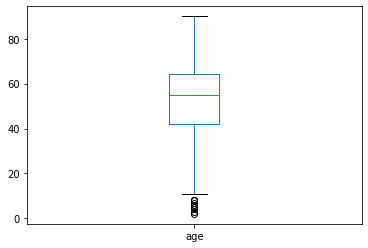

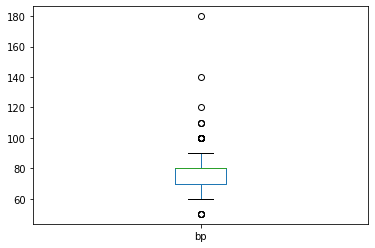

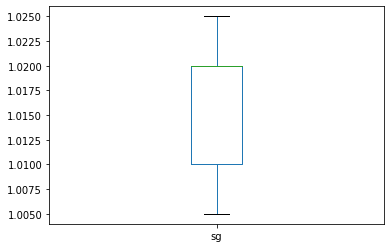

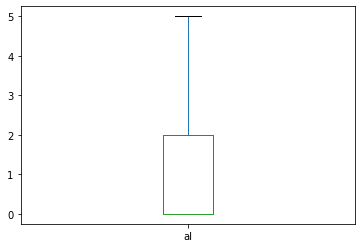

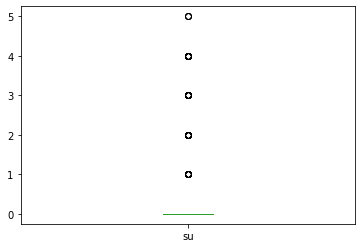

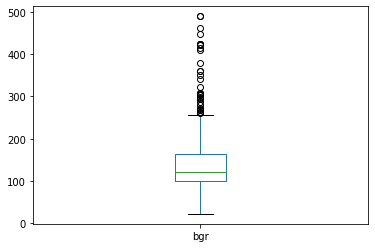

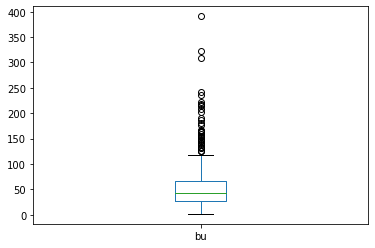

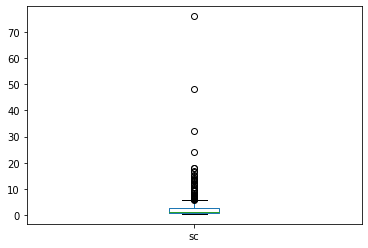

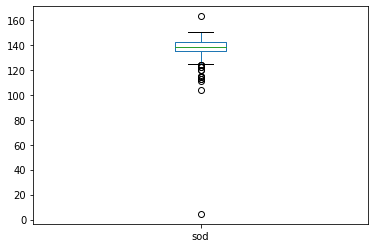

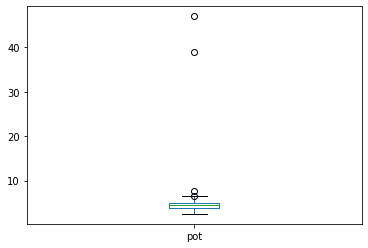

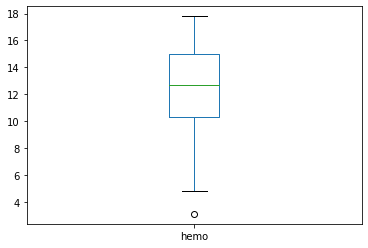

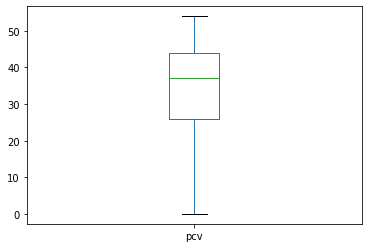

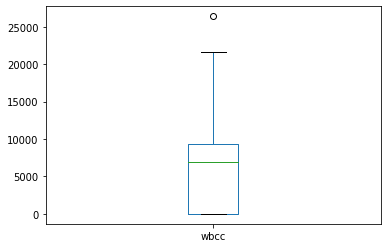

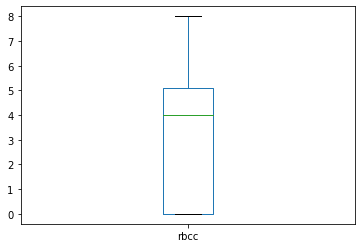

In [ ]:
for variables in [ 'age', 'bp', 'sg', 'al', 'su','bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']:
    plot_boxplot(kd,variables)

As we see we have outliers, we go for removing.

### Removing outliers

In [ ]:
def outliers(kd,ft):
    Q1 = kd[ft].quantile(0.25)
    Q3 = kd[ft].quantile(0.75)
    IQR = Q3 - Q1

    lowerbound = Q1 - (1.5 * IQR)
    upperbound = Q3 + (1.5 * IQR)

    ss = kd.index[ (kd[ft] < lowerbound) | (kd[ft] > upperbound )]

    return ss

In [ ]:
index_list = []
for variables in [ 'age', 'bp', 'sg', 'al', 'su','bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']:
    index_list.extend(outliers(kd,variables))

In [ ]:
len(index_list)

252

In [ ]:
def remove (kd ,ss):
    ss = sorted(set(ss))
    kd = kd.drop(ss)

    return kd

In [ ]:
kd_clean = remove(kd, index_list)
kd_clean.shape

(254, 25)


### Result of removing outlires

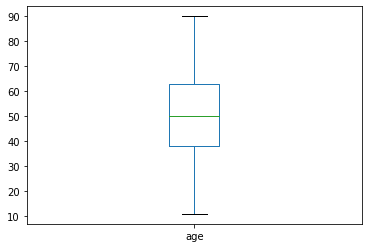

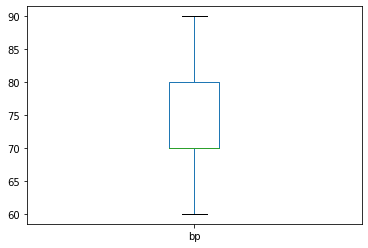

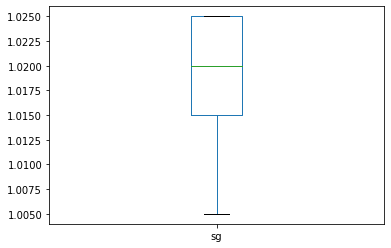

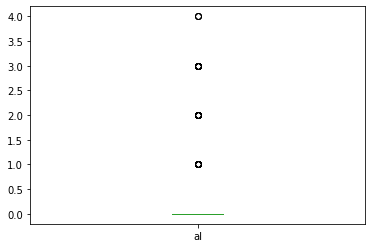

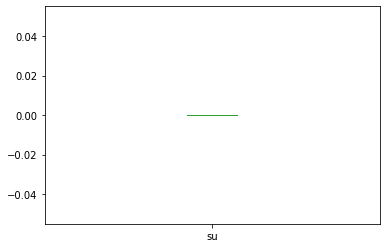

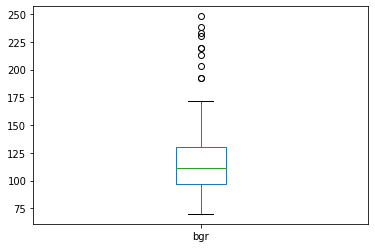

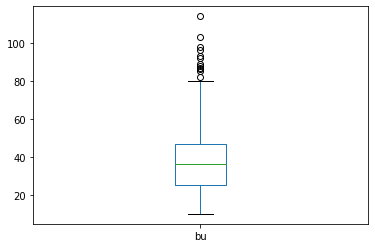

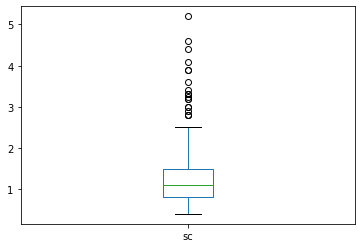

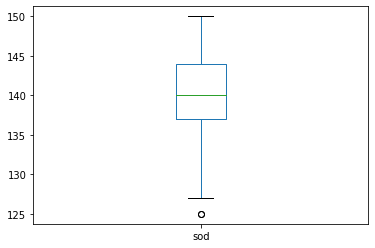

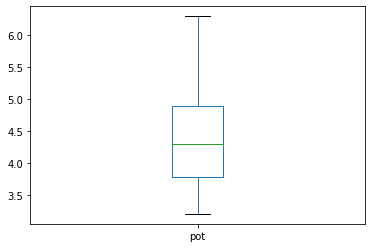

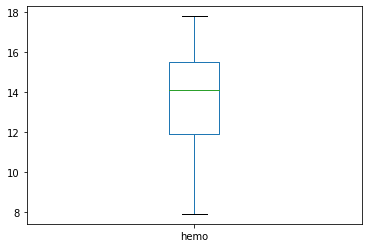

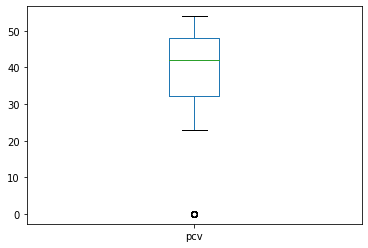

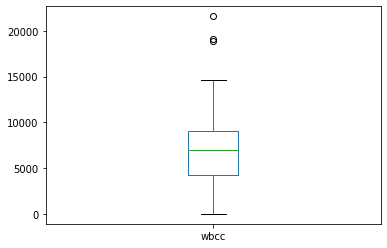

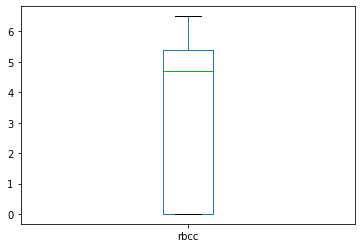

In [ ]:
for variables in ['age', 'bp', 'sg', 'al', 'su','bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']:
    plot_boxplot(kd_clean , variables)

In [ ]:
x= kd.iloc[:,:(kd.shape[1]-1)]
y= kd.iloc[:,-1]
print(x.shape , y.shape)

(400, 24) (400,)


we see some features have less correlation than the other . so we remove them to find the best removing outlier .

## Missing value

### Counting missing value

In [ ]:
# counting missing value (NAN types)
kd_clean.isnull().sum()

age       4
bp        5
sg       22
al       22
su       25
rbc       0
pc        0
pcc       0
ba        0
bgr      23
bu       13
sc       13
sod      50
pot      50
hemo     28
pcv       0
wbcc      0
rbcc      0
htn       0
dm        0
cad       0
appet     0
pe        0
ane       0
class     0
dtype: int64

In [ ]:
missing=kd_clean.isna().sum().sort_values(ascending=False)
print(missing)

sod      50
pot      50
hemo     28
su       25
bgr      23
sg       22
al       22
bu       13
sc       13
bp        5
age       4
ba        0
pcc       0
pc        0
rbc       0
pcv       0
wbcc      0
rbcc      0
htn       0
dm        0
cad       0
appet     0
pe        0
ane       0
class     0
dtype: int64


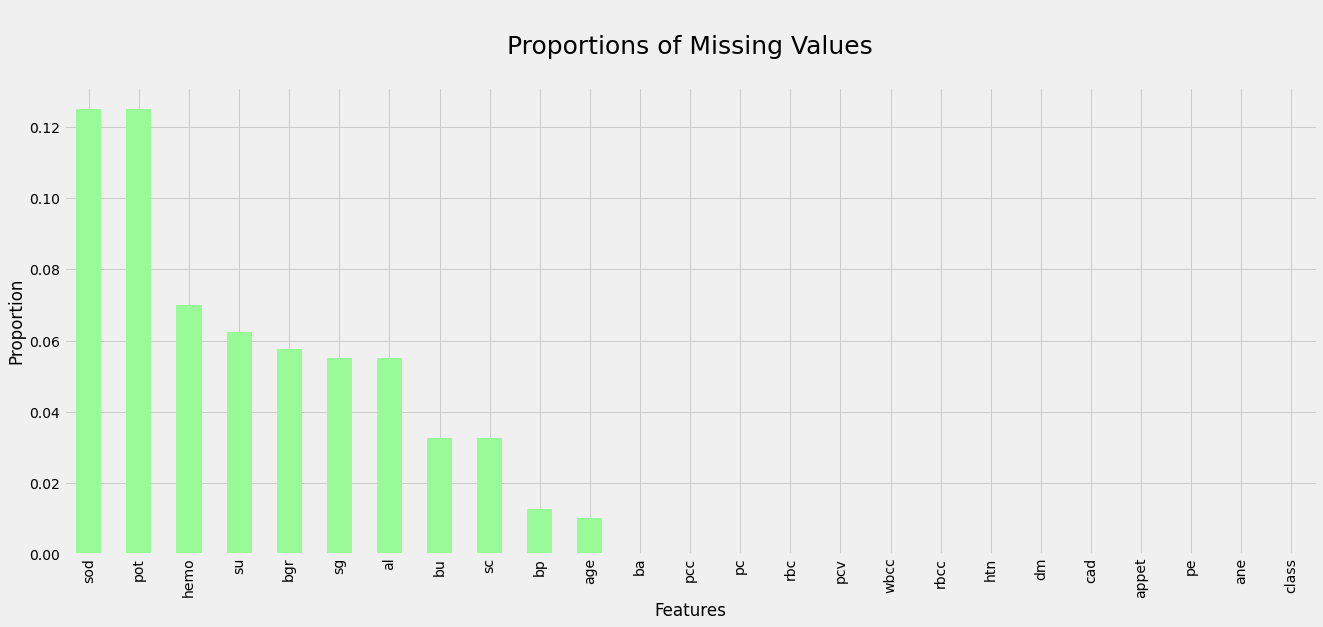

In [ ]:
from matplotlib import style
style.use("fivethirtyeight")
plt.figure(figsize=(20,8))
(missing/400).plot(kind="bar", color="palegreen") #400 is the number of patients/rows/examples/observations/lines in our data
#The "missing" variable contains the numbers of missing values, so we divide by 400 to get the proportions.
plt.title('\nProportions of Missing Values\n', fontsize=25)
plt.ylabel("Proportion")
plt.xlabel("Features")
plt.show()

### Filling missing value

For filling missisng values, we use 3 models to fill nans.we evaluate to see which model has the best accuracy.



#### Type1:delete all the nans.

In [ ]:
data_drop=kd_clean.copy()
data_drop

age    bp     sg   al   su  rbc  pc  pcc  ba    bgr  ...  pcv  wbcc  \
0    48.0  80.0  1.020  1.0  0.0    0   0    1   1  121.0  ...   44  7800   
4    51.0  80.0  1.010  2.0  0.0    0   0    1   1  106.0  ...   35  7300   
5    60.0  90.0  1.015  3.0  0.0    0   0    1   1   74.0  ...   39  7800   
13   68.0  70.0    NaN  NaN  NaN    0   0    1   1   98.0  ...    0     0   
16   47.0  70.0  1.015  2.0  0.0    0   0    1   1   99.0  ...    0     0   
..    ...   ...    ...  ...  ...  ...  ..  ...  ..    ...  ...  ...   ...   
395  55.0  80.0  1.020  0.0  0.0    0   0    1   1  140.0  ...   47  6700   
396  42.0  70.0  1.025  0.0  0.0    0   0    1   1   75.0  ...   54  7800   
397  12.0  80.0  1.020  0.0  0.0    0   0    1   1  100.0  ...   49  6600   
398  17.0  60.0  1.025  0.0  0.0    0   0    1   1  114.0  ...   51  7200   
399  58.0  80.0  1.025  0.0  0.0    0   0    1   1  131.0  ...   53  6800   

     rbcc  htn  dm  cad  appet  pe  ane  class  
0     5.2    0   0    1      1   1    1      0  
4     4.6    1   1    1      1   1    1      0  
5     4.4    0   0    1      1   0    1      0  
13    0.0    0   0    0      0   0    1      0  
16    0.0    1   1    1      1   1    1      0  
..    ...  ...  ..  ...    ...  ..  ...    ...  
395   4.9    1   1    1      1   1    1      1  
396   6.2    1   1    1      1   1    1      1  
397   5.4    1   1    1      1   1    1      1  
398   5.9    1   1    1      1   1    1      1  
399   6.1    1   1    1      1   1    1      1  

[254 rows x 25 columns]

In [ ]:
print("Before:",data_drop.shape)
data_drop.dropna(inplace = True)
print(data_drop.isnull().sum())
print("After:",data_drop.shape)

Before: (254, 25)
age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64
After: (159, 25)


#### Type2:filling with mean(numerical),mode(nominal) of each column.

In [ ]:
data_fill=kd_clean.copy()
data_fill

age    bp     sg   al   su  rbc  pc  pcc  ba    bgr  ...  pcv  wbcc  \
0    48.0  80.0  1.020  1.0  0.0    0   0    1   1  121.0  ...   44  7800   
4    51.0  80.0  1.010  2.0  0.0    0   0    1   1  106.0  ...   35  7300   
5    60.0  90.0  1.015  3.0  0.0    0   0    1   1   74.0  ...   39  7800   
13   68.0  70.0    NaN  NaN  NaN    0   0    1   1   98.0  ...    0     0   
16   47.0  70.0  1.015  2.0  0.0    0   0    1   1   99.0  ...    0     0   
..    ...   ...    ...  ...  ...  ...  ..  ...  ..    ...  ...  ...   ...   
395  55.0  80.0  1.020  0.0  0.0    0   0    1   1  140.0  ...   47  6700   
396  42.0  70.0  1.025  0.0  0.0    0   0    1   1   75.0  ...   54  7800   
397  12.0  80.0  1.020  0.0  0.0    0   0    1   1  100.0  ...   49  6600   
398  17.0  60.0  1.025  0.0  0.0    0   0    1   1  114.0  ...   51  7200   
399  58.0  80.0  1.025  0.0  0.0    0   0    1   1  131.0  ...   53  6800   

     rbcc  htn  dm  cad  appet  pe  ane  class  
0     5.2    0   0    1      1   1    1      0  
4     4.6    1   1    1      1   1    1      0  
5     4.4    0   0    1      1   0    1      0  
13    0.0    0   0    0      0   0    1      0  
16    0.0    1   1    1      1   1    1      0  
..    ...  ...  ..  ...    ...  ..  ...    ...  
395   4.9    1   1    1      1   1    1      1  
396   6.2    1   1    1      1   1    1      1  
397   5.4    1   1    1      1   1    1      1  
398   5.9    1   1    1      1   1    1      1  
399   6.1    1   1    1      1   1    1      1  

[254 rows x 25 columns]

In [ ]:
print("Before:",data_fill.shape)

Before: (254, 25)


In [ ]:
# mean #mode
data_fill['age'].fillna(data_fill['age'].mean(),inplace=True)
data_fill['bp'].fillna(data_fill['bp'].mean(),inplace=True)
data_fill['sg'].fillna(data_fill['sg'].mean(),inplace=True)
data_fill['al'].fillna(data_fill['al'].mean(),inplace=True)
data_fill['su'].fillna(data_fill['su'].mean(),inplace=True)
data_fill['bgr'].fillna(data_fill['bgr'].mean(),inplace=True)
data_fill['bu'].fillna(data_fill['bu'].mean(),inplace=True)
data_fill['sc'].fillna(data_fill['sc'].mode()[0],inplace=True)
data_fill['sod'].fillna(data_fill['sod'].mean(),inplace=True)
data_fill['pot'].fillna(data_fill['pot'].mean(),inplace=True)
data_fill['hemo'].fillna(data_fill['hemo'].mean(),inplace=True)

print(data_fill.isnull().sum())
print("After:",data_fill.shape)

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64
After: (254, 25)


#### Type3:KNN method

In [ ]:
data_knn=kd_clean.copy()
data_knn

age    bp     sg   al   su  rbc  pc  pcc  ba    bgr  ...  pcv  wbcc  \
0    48.0  80.0  1.020  1.0  0.0    0   0    1   1  121.0  ...   44  7800   
4    51.0  80.0  1.010  2.0  0.0    0   0    1   1  106.0  ...   35  7300   
5    60.0  90.0  1.015  3.0  0.0    0   0    1   1   74.0  ...   39  7800   
13   68.0  70.0    NaN  NaN  NaN    0   0    1   1   98.0  ...    0     0   
16   47.0  70.0  1.015  2.0  0.0    0   0    1   1   99.0  ...    0     0   
..    ...   ...    ...  ...  ...  ...  ..  ...  ..    ...  ...  ...   ...   
395  55.0  80.0  1.020  0.0  0.0    0   0    1   1  140.0  ...   47  6700   
396  42.0  70.0  1.025  0.0  0.0    0   0    1   1   75.0  ...   54  7800   
397  12.0  80.0  1.020  0.0  0.0    0   0    1   1  100.0  ...   49  6600   
398  17.0  60.0  1.025  0.0  0.0    0   0    1   1  114.0  ...   51  7200   
399  58.0  80.0  1.025  0.0  0.0    0   0    1   1  131.0  ...   53  6800   

     rbcc  htn  dm  cad  appet  pe  ane  class  
0     5.2    0   0    1      1   1    1      0  
4     4.6    1   1    1      1   1    1      0  
5     4.4    0   0    1      1   0    1      0  
13    0.0    0   0    0      0   0    1      0  
16    0.0    1   1    1      1   1    1      0  
..    ...  ...  ..  ...    ...  ..  ...    ...  
395   4.9    1   1    1      1   1    1      1  
396   6.2    1   1    1      1   1    1      1  
397   5.4    1   1    1      1   1    1      1  
398   5.9    1   1    1      1   1    1      1  
399   6.1    1   1    1      1   1    1      1  

[254 rows x 25 columns]

In [ ]:
print("Before:",data_knn.shape)

Before: (254, 25)


In [ ]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=5)
data_knn=pd.DataFrame(imputer.fit_transform(data_knn),columns=data_knn.columns)

data_knn.isnull().sum()
print("After:",data_knn.shape)

After: (254, 25)


### Missing value accuracy

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#original data
values= kd.values
x= values[:,:-1]
y= values[:,-1]
model= LinearDiscriminantAnalysis()
cv= KFold()
result= cross_val_score(model, x, y, cv=cv, scoring='accuracy')
print('Original Dataset Accuracy : %.3f '% result.mean())

#type 1
values= data_drop.values
x= values[:,:-1]
y= values[:,-1]
model= LinearDiscriminantAnalysis()
cv= KFold(n_splits=3, shuffle=True, random_state=1)
result= cross_val_score(model, x, y, cv=cv, scoring='accuracy')
print('Ttpe 1 Accuracy : %.3f' % result.mean())

#type2
values= data_fill.values
x= values[:,:-1]
y= values[:,-1]
model= LinearDiscriminantAnalysis()
cv= KFold(n_splits=3, shuffle=True, random_state=1)
result= cross_val_score(model, x, y, cv=cv, scoring='accuracy')
print('Type 2 Accuracy : %.3f' % result.mean())

#type3
values= data_knn.values
x= values[:,:-1]
y= values[:,-1]
model= LinearDiscriminantAnalysis()
cv= KFold()
result= cross_val_score(model, x, y, cv=cv, scoring='accuracy')
print('Type 3 Accuracy : %.3f' % result.mean())

Original Dataset Accuracy : nan 
Ttpe 1 Accuracy : 0.981
Type 2 Accuracy : 0.972
Type 3 Accuracy : 0.949


Although type 1 (eliminating missing values) has the highest accuracy in this dataset,we choose the second type(filling missing values with mean/mode).because too much data has ben removed from removing outlieres.

In [ ]:
kd_clean['age'].fillna(kd_clean['age'].mean(),inplace=True)
kd_clean['bp'].fillna(kd_clean['bp'].mean(),inplace=True)
kd_clean['sg'].fillna(kd_clean['sg'].mean(),inplace=True)
kd_clean['al'].fillna(kd_clean['al'].mean(),inplace=True)
kd_clean['su'].fillna(kd_clean['su'].mean(),inplace=True)
kd_clean['bgr'].fillna(kd_clean['bgr'].mean(),inplace=True)
kd_clean['bu'].fillna(kd_clean['bu'].mean(),inplace=True)
kd_clean['sc'].fillna(kd_clean['sc'].mode()[0],inplace=True)
kd_clean['sod'].fillna(kd_clean['sod'].mean(),inplace=True)
kd_clean['pot'].fillna(kd_clean['pot'].mean(),inplace=True)
kd_clean['hemo'].fillna(kd_clean['hemo'].mean(),inplace=True)

print(kd_clean.isnull().sum())
print("After:",kd_clean.shape)

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64
After: (254, 25)


## Checking data balance

In [ ]:
kd_clean['class'].value_counts()

1    150
0    104
Name: class, dtype: int64

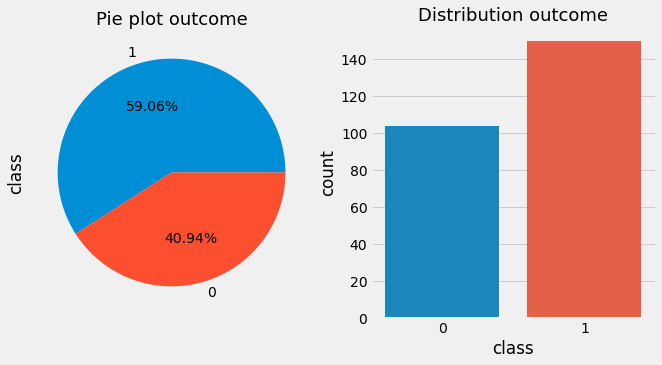

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
pie=kd_clean['class'].value_counts().plot(kind= 'pie', autopct='%.2f%%')
pie.set_title('Pie plot outcome',size=18)
plt.subplot(1,2,2)
cnt=sns.countplot( x='class', data=kd_clean )
cnt.set_title('Distribution outcome',size=18)
plt.show()

## Seperating x&y /train & test

In [ ]:
#Seperating the data to x and y to identify input and output fearture.
x= kd_clean.iloc[:,:(kd_clean.shape[1]-1)]
y= kd_clean.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state =1)
print('Train set: ',x_train.shape, y_train.shape)
print('Test set: ',x_test.shape, y_test.shape)

Train set:  (203, 24) (203,)
Test set:  (51, 24) (51,)


## Oversampling

In [ ]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn.over_sampling import RandomOverSampler,SMOTE

# oversample=SMOTE()
# x_train, y_train = oversample.fit_resample(x_train, y_train)
RandomOverSample= RandomOverSampler(sampling_strategy='minority', random_state= 0)
x_train, y_train= RandomOverSample.fit_resample(x_train, y_train)

In [ ]:
print(x_train.shape)
print(y_train.shape)

(246, 24)
(246,)


# Modeling

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

## 1. Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#initialize the decision tree Model
decision_tree_model = DecisionTreeClassifier(random_state = 0)

In [ ]:
#defining the decision tree parameters for grid search
dt_parameters_grid = {'criterion': ['gini', 'entropy'],
                      'splitter': ['best', 'random'],
                      'min_samples_leaf': [1, 2, 3, 4, 5],
                      'max_features': ['auto', 'sqrt', 'log2']}

#print which are best parameters after gridsearch
print('The best parameters are:\n ' +str(DTQ.best_params_))

#print the best model after gridsearch
print('\nThe best model after gridsearch is:\n ' + str(DTQ.best_estimator_))


The best parameters are:
 {'criterion': 'entropy', 'max_features': 'auto', 'min_samples_leaf': 1, 'splitter': 'best'}

The best model after gridsearch is:
 DecisionTreeClassifier(criterion='entropy', max_features='auto', random_state=0)


In [ ]:
#apply exhaustice gridsearch to find the optimal solution_)
DTQ=DecisionTreeClassifier(criterion= "entropy", max_features="auto",min_samples_leaf= 1,splitter="best",random_state =0)

In [ ]:
#fit the data to the grid
DTQ.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_features='auto', random_state=0)

In [ ]:
#Decision Tree predictions on x_test
dt_prediction = DTQ.predict(x_test)

In [ ]:
#display classification Metrices for Decision Tree
print('Test set Accuracy: ' + str(metrics.accuracy_score(y_test, dt_prediction)))
print('\nPrecision: ' + str(metrics.precision_score(y_test, dt_prediction)))
print('Recall: ' + str(metrics.recall_score(y_test, dt_prediction)))
print('F1-score: ' + str(metrics.f1_score(y_test, dt_prediction)))

#display classification report for Decision Tree
print('\nClassification Report:\n' + str(metrics.classification_report(y_test, dt_prediction)))

Test set Accuracy: 0.9411764705882353

Precision: 0.9615384615384616
Recall: 0.9259259259259259
F1-score: 0.9433962264150944

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        24
           1       0.96      0.93      0.94        27

    accuracy                           0.94        51
   macro avg       0.94      0.94      0.94        51
weighted avg       0.94      0.94      0.94        51




Confusion Matrix: 
[[23  1]
 [ 2 25]]


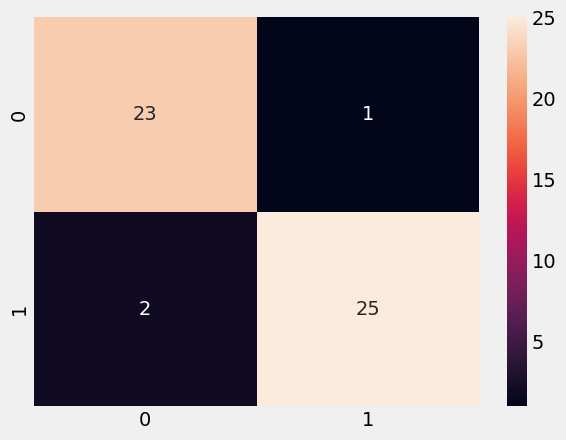

In [ ]:
#display confusion matrix
print('\nConfusion Matrix: \n' + str(metrics.confusion_matrix(y_test, dt_prediction)))

#plot confusion matrix
sns.heatmap(metrics.confusion_matrix(y_test, dt_prediction), annot = True)
plt.show()

random pred is  0.5
dt test auc 0.9421296296296298


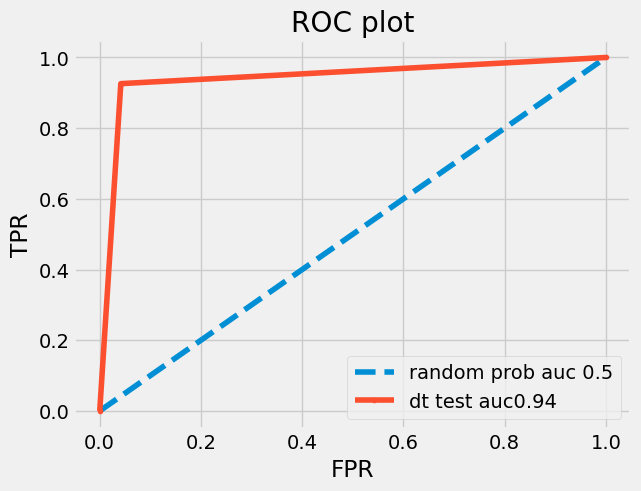

In [ ]:
#Roc curve
dt_probs = [0 for i in range(len(y_test))]
DT_prob_test = DTQ.predict_proba(x_test)
DT_prob_test = DT_prob_test[:,1]
dt_auc = roc_auc_score(y_test,dt_probs)
DT_auc_test = roc_auc_score(y_test,DT_prob_test)
print('random pred is ',dt_auc)
print('dt test auc',DT_auc_test)

#calc ROC curve
dt_fpr,dt_tpr,i = roc_curve(y_test,dt_probs)
dt_fpr1,dt_tpr1,i = roc_curve(y_test,DT_prob_test)

#plot
plt.plot(dt_fpr,dt_tpr,label = f"random prob auc {dt_auc}",linestyle = '--')
plt.plot(dt_fpr1,dt_tpr1,label = f'dt test auc{round(DT_auc_test,2)}',marker = '.')
plt.title('ROC plot')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

In [ ]:
from sklearn.tree import plot_tree


plt.figure(figsize = (200,70))
plot_tree(DTQ,feature_names =kd_clean.columns,filled =True, fontsize=12,rounded=True,impurity=True)
plt.show()

## 2.Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

#initialize the random forest Model
random_forest_model = RandomForestClassifier(random_state = 0)
random_forest_model.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
#defining the random forest parameters for grid search
rf_parameters_grid = {'n_estimators': [10, 30, 40, 50, 60, 70, 80, 90, 100],
                      'criterion': ['gini', 'entropy'],
                      'min_samples_split': [1.0, 2, 3, 4, 5],
                      'max_features': ['auto', 'sqrt', 'log2']}

#apply exhaustice gridsearch to find the optimal solution
rfQ = GridSearchCV(random_forest_model, rf_parameters_grid, scoring = 'accuracy')

#fit the data to the grid
rfQ.fit(x_train,y_train)

#print which are best parameters after gridsearch
print('The best parameters are:\n ' +str(rfQ.best_params_))

#print the best model after gridsearch
print('\nThe best model after gridsearch is:\n ' + str(rfQ.best_estimator_))

The best parameters are:
 {'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 10}

The best model after gridsearch is:
 RandomForestClassifier(n_estimators=10, random_state=0)


In [ ]:
#Random forest predictions on x_test
rf_prediction = rfQ.predict(x_test)

In [ ]:
#display classification Metrices for Random forest
print('Accuracy: ' + str(metrics.accuracy_score(y_test, rf_prediction)))
print('\nPrecision: ' + str(metrics.precision_score(y_test, rf_prediction)))
print('Recall: ' + str(metrics.recall_score(y_test, rf_prediction)))
print('F1-score: ' + str(metrics.f1_score(y_test, rf_prediction)))

#display classification report for Random forest
print('\nClassification Report:\n' + str(metrics.classification_report(y_test, rf_prediction)))


Accuracy: 0.9607843137254902

Precision: 0.9310344827586207
Recall: 1.0
F1-score: 0.9642857142857143

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        24
           1       0.93      1.00      0.96        27

    accuracy                           0.96        51
   macro avg       0.97      0.96      0.96        51
weighted avg       0.96      0.96      0.96        51




Confusion Matrix: 
[[22  2]
 [ 0 27]]


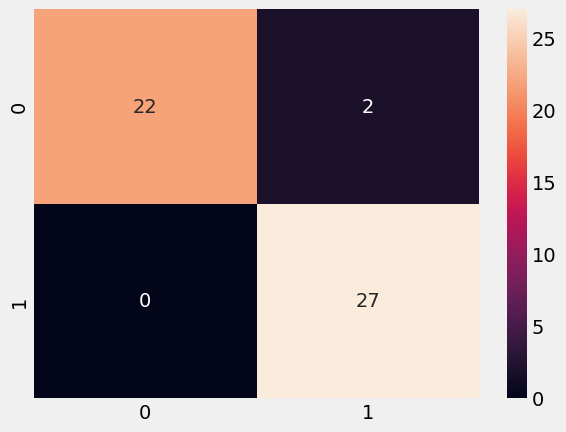

In [ ]:
#display confusion matrix
print('\nConfusion Matrix: \n' + str(metrics.confusion_matrix(y_test, rf_prediction)))

#plot confusion matrix
sns.heatmap(metrics.confusion_matrix(y_test, rf_prediction), annot = True)
plt.show()

random pred is  0.5
dt test auc 1.0


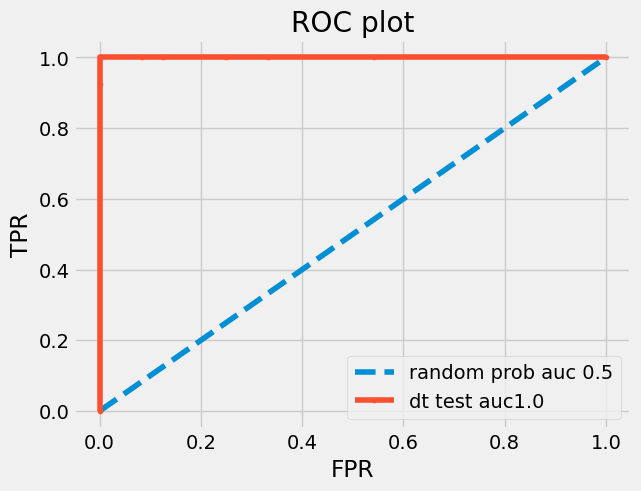

In [ ]:
#Roc curve
r_probs = [0 for i in range(len(y_test))]
Rf_prob_test = rfQ.predict_proba(x_test)
Rf_prob_test = Rf_prob_test[:,1]
r_auc = roc_auc_score(y_test,r_probs)
Rf_auc_test = roc_auc_score(y_test,Rf_prob_test)
print('random pred is ',r_auc)
print('dt test auc',Rf_auc_test)

#calc ROC curve
r_fpr,r_tpr,i = roc_curve(y_test,r_probs)
r_fpr1,r_tpr1,i = roc_curve(y_test,Rf_prob_test)

#plot
plt.plot(r_fpr,r_tpr,label = f"random prob auc {r_auc}",linestyle = '--')
plt.plot(r_fpr1,r_tpr1,label = f'dt test auc{round(Rf_auc_test,2)}',marker = '.')
plt.title('ROC plot')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

## Normalizing

In [ ]:
#normalizing Data for SVM, KNN, Bagging, Boosting
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x= pd.DataFrame(scaler.fit_transform(kd_clean.drop(['class'],axis= 1),),
               columns=['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad','appet', 'pe', 'ane'])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state =1)
print('Train set: ',x_train.shape, y_train.shape)
print('Test set: ',x_test.shape, y_test.shape)

Train set:  (203, 24) (203,)
Test set:  (51, 24) (51,)


## 3.Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
#initialize the Support Vector Model
support_vector_machine_model = SVC(probability=True,random_state = 0)
support_vector_machine_model.fit(x_train,y_train)

SVC(probability=True, random_state=0)

In [ ]:
#defining the svc parameters for grid search
parameters_grid = {'kernel': ['poly', 'rbf', 'linear'],
                   'C': [0.1,0.25,0.75,1],
                   'gamma': ['scale', 'auto'],
                   'shrinking': [True, False]}

#apply exhaustice gridsearch to find the optimal solution
smq = GridSearchCV(support_vector_machine_model, parameters_grid, scoring = 'accuracy')

#fit the data to the grid
smq.fit (x_train, y_train)

#print which are best parameters after gridsearch
print('The best parameters are:\n ' +str(smq.best_params_))

#print the best model after gridsearch
print('\nThe best model after gridsearch is:\n ' + str(smq.best_estimator_))

The best parameters are:
 {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear', 'shrinking': True}

The best model after gridsearch is:
 SVC(C=0.1, kernel='linear', probability=True, random_state=0)


In [ ]:
#svm predictions on x_test
svm_prediction = smq.predict(x_test)

In [ ]:
#display SVM classification Metrices for SVM
print('\nPrecision: ' + str(metrics.precision_score(y_test, svm_prediction)))
print('Accuracy: ' + str(metrics.accuracy_score(y_test, svm_prediction)))
print('Recall: ' + str(metrics.recall_score(y_test, svm_prediction)))
print('F1-score: ' + str(metrics.f1_score(y_test, svm_prediction)))

#display classification report for SVM
print('\nClassification Report:\n' + str(metrics.classification_report(y_test, svm_prediction)))


Precision: 0.9642857142857143
Accuracy: 0.9803921568627451
Recall: 1.0
F1-score: 0.9818181818181818

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       0.96      1.00      0.98        27

    accuracy                           0.98        51
   macro avg       0.98      0.98      0.98        51
weighted avg       0.98      0.98      0.98        51




Confusion Matrix: 
[[23  1]
 [ 0 27]]


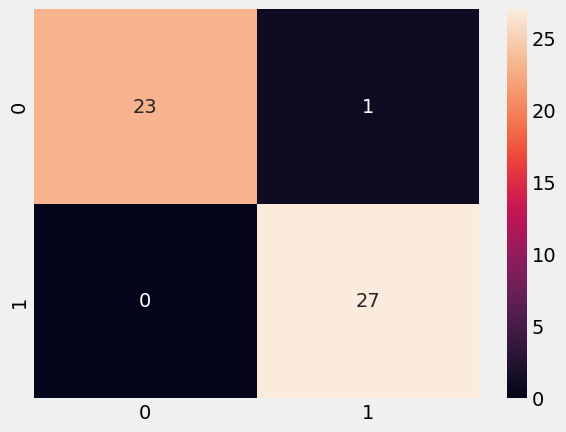

In [ ]:
#display confusion matrix
print('\nConfusion Matrix: \n' + str(metrics.confusion_matrix(y_test, svm_prediction)))

#plot confusion matrix
sns.heatmap(metrics.confusion_matrix(y_test, svm_prediction), annot = True)
plt.show()

random pred is  0.5
dt test auc 1.0


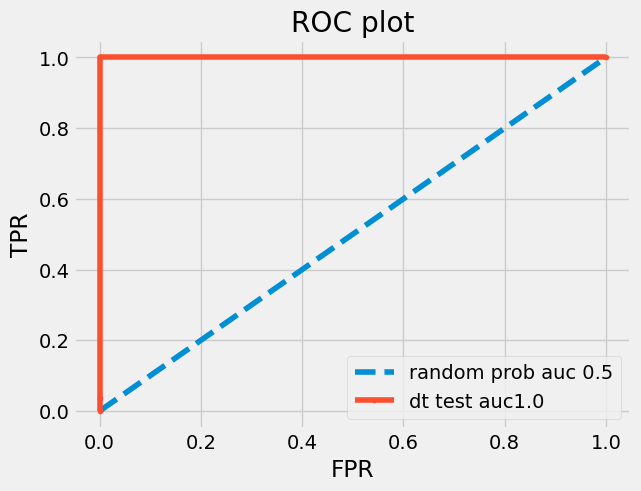

In [ ]:
#Roc curve
svm_probs = [0 for i in range(len(y_test))]
svm_prob_test = smq.predict_proba(x_test)
svm_prob_test = svm_prob_test[:,1]
svm_auc = roc_auc_score(y_test,svm_probs)
svm_auc_test = roc_auc_score(y_test,svm_prob_test)
print('random pred is ',svm_auc)
print('dt test auc',svm_auc_test)

#calc ROC curve
svm_fpr,svm_tpr,i = roc_curve(y_test,svm_probs)
svm_fpr1,svm_tpr1,i = roc_curve(y_test,svm_prob_test)

#plot
plt.plot(svm_fpr,svm_tpr,label = f"random prob auc {svm_auc}",linestyle = '--')
plt.plot(svm_fpr1,svm_tpr1,label = f'dt test auc{round(svm_auc_test,2)}',marker = '.')
plt.title('ROC plot')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

## 3.KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#initialise the k nearest neighbour Model
k_nearest_neighbour_model = KNeighborsClassifier()

In [ ]:
#defining the knn parameters for grid search
knn_parameters_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                       'weights': ['uniform', 'distance', 'manhattan'],
                       'algorithm':['auto', 'ball_tree','kd_tree','brute'],
                       'n_jobs':[1, -1]}

#apply exhaustice gridsearch to find the optimal solution
knnQ = GridSearchCV(k_nearest_neighbour_model, knn_parameters_grid, scoring = 'accuracy')

#fit the data to the grid
knnQ.fit(x_train, y_train)

#print which are best parameters after gridsearch
print('The best parameters are:\n ' +str(knnQ.best_params_))

#print the best model after gridsearch
print('\nThe best model after gridsearch is:\n ' + str(knnQ.best_estimator_))


The best parameters are:
 {'algorithm': 'auto', 'n_jobs': 1, 'n_neighbors': 6, 'weights': 'uniform'}

The best model after gridsearch is:
 KNeighborsClassifier(n_jobs=1, n_neighbors=6)


In [ ]:
#KNN predictions on x_test
knn_prediction = knnQ.predict(x_test)

In [ ]:
#display KNN classification Metrices
print('\nPrecision: ' + str(metrics.precision_score(y_test, knn_prediction)))
print('Accuracy: ' + str(metrics.accuracy_score(y_test, knn_prediction)))
print('Recall: ' + str(metrics.recall_score(y_test, knn_prediction)))
print('F1-score: ' + str(metrics.f1_score(y_test, knn_prediction)))

#display classification report for KNN
print('\nClassification Report:\n' + str(metrics.classification_report(y_test, knn_prediction)))


Precision: 0.9310344827586207
Accuracy: 0.9607843137254902
Recall: 1.0
F1-score: 0.9642857142857143

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        24
           1       0.93      1.00      0.96        27

    accuracy                           0.96        51
   macro avg       0.97      0.96      0.96        51
weighted avg       0.96      0.96      0.96        51




Confusion Matrix: 
[[22  2]
 [ 0 27]]


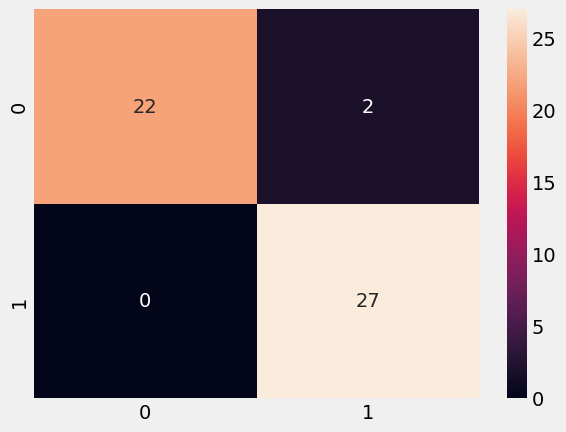

In [ ]:
#display confusion matrix
print('\nConfusion Matrix: \n' + str(metrics.confusion_matrix(y_test, knn_prediction)))

#plot confusion matrix
sns.heatmap(metrics.confusion_matrix(y_test, knn_prediction), annot = True)
plt.show()

random pred is  0.5
dt test auc 1.0


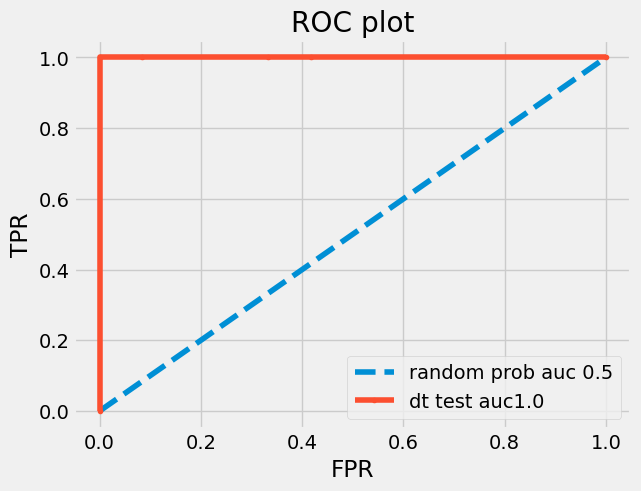

In [ ]:
#Roc curve
knn_probs = [0 for i in range(len(y_test))]
knn_prob_test = knnQ.predict_proba(x_test)
knn_prob_test = knn_prob_test[:,1]
knn_auc = roc_auc_score(y_test,knn_probs)
knn_auc_test = roc_auc_score(y_test,knn_prob_test)
print('random pred is ',knn_auc)
print('dt test auc',knn_auc_test)

#calc ROC curve
knn_fpr,knn_tpr,i = roc_curve(y_test,knn_probs)
knn_fpr1,knn_tpr1,i = roc_curve(y_test,knn_prob_test)

#plot
plt.plot(knn_fpr,knn_tpr,label = f"random prob auc {knn_auc}",linestyle = '--')
plt.plot(knn_fpr1,knn_tpr1,label = f'dt test auc{round(knn_auc_test,2)}',marker = '.')
plt.title('ROC plot')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

## 4.Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

#initialize the Bagging ensemble
bag = BaggingClassifier(n_estimators=100,oob_score=True)


In [ ]:
#defining the bagging parameters for grid search
parameters_bag= {'bootstrap': [True, False],
'bootstrap_features': [True, False],
'n_estimators': [5, 10, 15],
'max_samples' : [0.6, 0.8, 1.0]}

#apply exhaustice gridsearch to find the optimal solution
bagQ = GridSearchCV(estimator=bag , param_grid =parameters_bag , cv = 5, verbose=1)

#fit the data to the grid
bagQ.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=BaggingClassifier(n_estimators=100, oob_score=True),
             param_grid={'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_samples': [0.6, 0.8, 1.0],
                         'n_estimators': [5, 10, 15]},
             verbose=1)

In [ ]:
#print which are best parameters after gridsearch
print('The best parameters are:\n ' +str(bagQ.best_params_))

#print the best model after gridsearch
print('\nThe best model after gridsearch is:\n ' + str(bagQ.best_params_))

#bagging predictions on test features
bagging_prediction = bagQ.predict(x_test)

The best parameters are:
 {'bootstrap': True, 'bootstrap_features': True, 'max_samples': 1.0, 'n_estimators': 15}

The best model after gridsearch is:
 {'bootstrap': True, 'bootstrap_features': True, 'max_samples': 1.0, 'n_estimators': 15}


In [ ]:
#display  Metrices for gridsearch
print('\nPrecision: ' + str(metrics.precision_score(y_test, bagging_prediction)))
print('Accuracy: ' + str(metrics.accuracy_score(y_test, bagging_prediction)))
print('Recall: ' + str(metrics.recall_score(y_test, bagging_prediction)))
print('F1-score: ' + str(metrics.f1_score(y_test, bagging_prediction)))

#display classification report for SVM
print('\nClassification Report:\n' + str(metrics.classification_report(y_test, bagging_prediction)))


Precision: 0.896551724137931
Accuracy: 0.9215686274509803
Recall: 0.9629629629629629
F1-score: 0.9285714285714286

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91        24
           1       0.90      0.96      0.93        27

    accuracy                           0.92        51
   macro avg       0.93      0.92      0.92        51
weighted avg       0.92      0.92      0.92        51




Confusion Matrix: 
[[21  3]
 [ 1 26]]


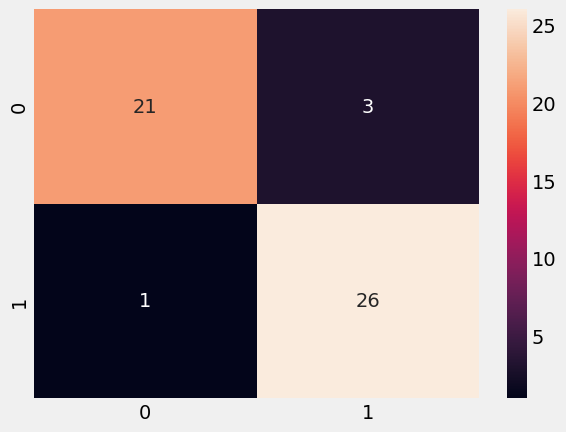

In [ ]:
#display confusion matrix
print('\nConfusion Matrix: \n' + str(metrics.confusion_matrix(y_test, bagging_prediction)))
#plot confusion matrix
sns.heatmap(metrics.confusion_matrix(y_test,bagging_prediction), annot = True)
plt.show()

In [ ]:
#Roc curve
bag_probs = [0 for i in range(len(y_test))]
bag_prob_test = bagQ.predict_proba(x_test)
bag_prob_test = bag_prob_test[:,1]
bag_auc = roc_auc_score(y_test,bag_probs)
bag_auc_test = roc_auc_score(y_test,bag_prob_test)
print('random pred is ',bag_auc)
print('bagging test auc',bag_auc_test)


random pred is  0.5
bagging test auc 0.9953703703703703


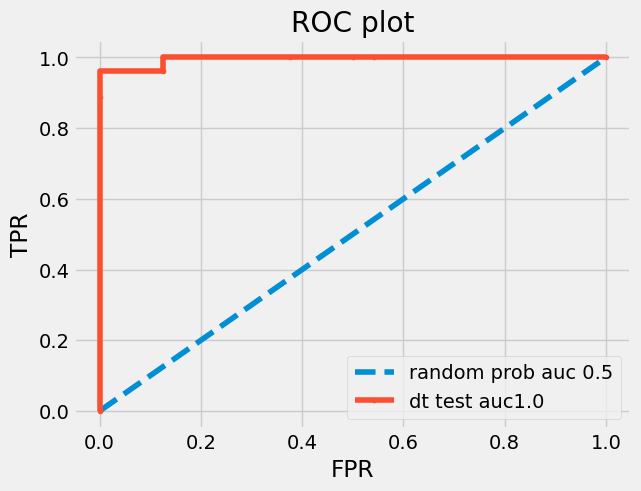

In [ ]:
#calc ROC curve
bag_fpr,bag_tpr,i = roc_curve(y_test,bag_probs)
bag_fpr1,bag_tpr1,i = roc_curve(y_test,bag_prob_test)

#plot
plt.plot(bag_fpr,bag_tpr,label = f"random prob auc {bag_auc}",linestyle = '--')
plt.plot(bag_fpr1,bag_tpr1,label = f'dt test auc{round(bag_auc_test,2)}',marker = '.')
plt.title('ROC plot')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

## Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

#initialize the Boosting ensemble
Boost = AdaBoostClassifier()
Boost.fit(x_train, y_train)

AdaBoostClassifier()

In [ ]:
#defining the Boosting parameters for grid search
parameters_boost = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[10,25,50,75,100,125,150,175]}

#apply exhaustice gridsearch to find the optimal solution
BOOstQ = GridSearchCV(estimator=Boost, param_grid=parameters_boost, n_jobs=-1, cv=cv, scoring='accuracy')

#fit the data to the grid
BOOstQ.fit (x_train, y_train)

#print which are best parameters after gridsearch
print('The best parameters are:\n ' +str(BOOstQ.best_params_))

#print the best model after gridsearch
print('\nThe best model after gridsearch is:\n ' + str(BOOstQ.best_estimator_))

The best parameters are:
 {'learning_rate': 0.05, 'n_estimators': 25}

The best model after gridsearch is:
 AdaBoostClassifier(learning_rate=0.05, n_estimators=25)


In [ ]:
#Boosting predictions on test features
Boosting_prediction = BOOstQ.predict(x_test)

In [ ]:
#display classification Metrices for Boosting
print('\nPrecision: ' + str(metrics.precision_score(y_test, Boosting_prediction)))
print('Accuracy: ' + str(metrics.accuracy_score(y_test, Boosting_prediction)))
print('Recall: ' + str(metrics.recall_score(y_test, Boosting_prediction)))
print('F1-score: ' + str(metrics.f1_score(y_test, Boosting_prediction)))

#display classification report for Boosting
print('\nClassification Report:\n' + str(metrics.classification_report(y_test, Boosting_prediction)))


Precision: 0.9642857142857143
Accuracy: 0.9803921568627451
Recall: 1.0
F1-score: 0.9818181818181818

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       0.96      1.00      0.98        27

    accuracy                           0.98        51
   macro avg       0.98      0.98      0.98        51
weighted avg       0.98      0.98      0.98        51




Confusion Matrix: 
[[23  1]
 [ 0 27]]


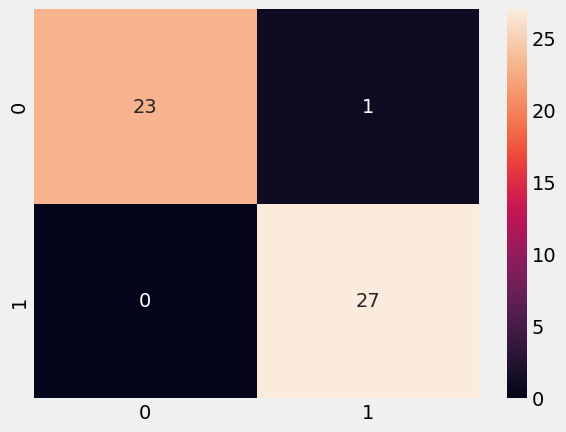

In [ ]:
#display confusion matrix
print('\nConfusion Matrix: \n' + str(metrics.confusion_matrix(y_test, Boosting_prediction)))

#plot confusion matrix
sns.heatmap(metrics.confusion_matrix(y_test,Boosting_prediction), annot = True)
plt.show()

random pred is  0.5
dt test auc 0.9969135802469137


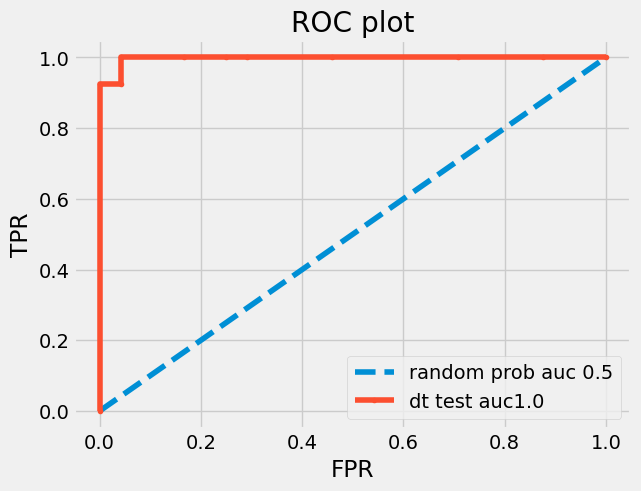

In [ ]:
#Roc curve
boost_probs = [0 for i in range(len(y_test))]
boost_prob_test = BOOstQ.predict_proba(x_test)
boost_prob_test = boost_prob_test[:,1]
boost_auc = roc_auc_score(y_test,boost_probs)
boost_auc_test = roc_auc_score(y_test,boost_prob_test)
print('random pred is ',boost_auc)
print('dt test auc',boost_auc_test)

#calc ROC curve
boost_fpr,boost_tpr,i = roc_curve(y_test,boost_probs)
boost_fpr1,boost_tpr1,i = roc_curve(y_test,boost_prob_test)

#plot
plt.plot(boost_fpr,boost_tpr,label = f"random prob auc {boost_auc}",linestyle = '--')
plt.plot(boost_fpr1,boost_tpr1,label = f'dt test auc{round(boost_auc_test,2)}',marker = '.')
plt.title('ROC plot')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

## XG BOOST

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

#initialize the Boosting ensemble
estimator = XGBClassifier()
estimator.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [ ]:
from xgboost.sklearn import XGBRanker
#defining the xgboost parameters for grid search
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
#apply exhaustice gridsearch to find the optimal solution
xgbQ = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

#fit the data to the grid
xgbQ.fit(x, y)

#print which are best parameters after gridsearch
print('The best parameters are:\n ' +str(xgbQ.best_params_))

#print the best model after gridsearch
print('\nThe best model after gridsearch is:\n ' + str(xgbQ.best_estimator_))

Fitting 10 folds for each of 96 candidates, totalling 960 fits
The best parameters are:
 {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100}

The best model after gridsearch is:
 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=2, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)


In [ ]:
#Boosting predictions on test features
xgb_prediction = xgbQ.predict(x_test)

In [ ]:
#display classification Metrices for Boosting
print('\nPrecision: ' + str(metrics.precision_score(y_test, xgb_prediction)))
print('Accuracy: ' + str(metrics.accuracy_score(y_test, xgb_prediction)))
print('Recall: ' + str(metrics.recall_score(y_test, xgb_prediction)))
print('F1-score: ' + str(metrics.f1_score(y_test, xgb_prediction)))

#display classification report for Boosting
print('\nClassification Report:\n' + str(metrics.classification_report(y_test, xgb_prediction)))


Precision: 0.9642857142857143
Accuracy: 0.9803921568627451
Recall: 1.0
F1-score: 0.9818181818181818

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       0.96      1.00      0.98        27

    accuracy                           0.98        51
   macro avg       0.98      0.98      0.98        51
weighted avg       0.98      0.98      0.98        51




Confusion Matrix: 
[[23  1]
 [ 0 27]]


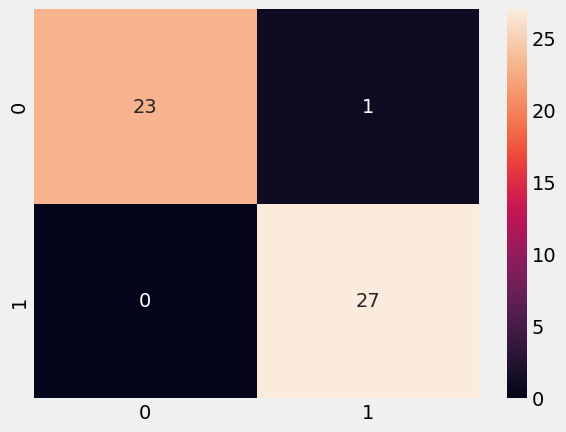

In [ ]:
#display confusion matrix
print('\nConfusion Matrix: \n' + str(metrics.confusion_matrix(y_test, xgb_prediction)))

#plot confusion matrix
sns.heatmap(metrics.confusion_matrix(y_test,xgb_prediction), annot = True)
plt.show()

random pred is  0.5
dt test auc 1.0


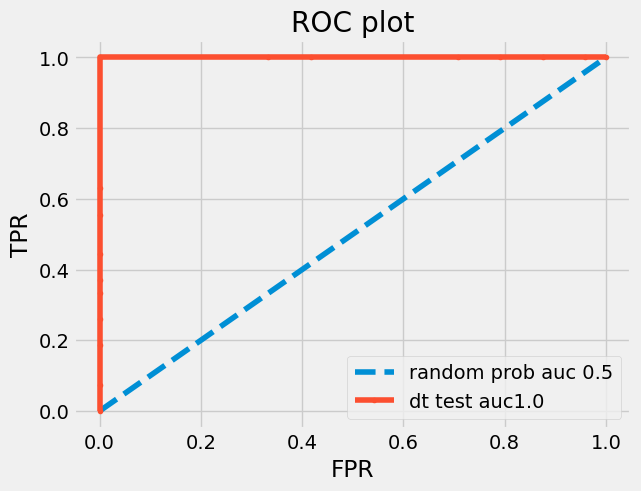

In [ ]:
#Roc curve
xgb_probs = [0 for i in range(len(y_test))]
xgb_prob_test = xgbQ.predict_proba(x_test)
xgb_prob_test = xgb_prob_test[:,1]
xgb_auc = roc_auc_score(y_test,xgb_probs)
xgb_auc_test = roc_auc_score(y_test,xgb_prob_test)
print('random pred is ',xgb_auc)
print('dt test auc',xgb_auc_test)

#calc ROC curve
xgb_fpr,xgb_tpr,i = roc_curve(y_test,xgb_probs)
xgb_fpr1,xgb_tpr1,i = roc_curve(y_test,xgb_prob_test)

#plot
plt.plot(xgb_fpr,xgb_tpr,label = f"random prob auc {xgb_auc}",linestyle = '--')
plt.plot(xgb_fpr1,xgb_tpr1,label = f'dt test auc{round(xgb_auc_test,2)}',marker = '.')
plt.title('ROC plot')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

## Model comparison

In [ ]:
knnaccuracy = metrics.accuracy_score(y_test, knn_prediction)
svmaccuracy = metrics.accuracy_score(y_test, svm_prediction)
dtaccuracy = metrics.accuracy_score(y_test,dt_prediction)
rfaccuracy = metrics.accuracy_score(y_test, rf_prediction)
Boostingaccuracy = metrics.accuracy_score(y_test, Boosting_prediction)
XGBoostaccuracy = metrics.accuracy_score(y_test, xgb_prediction)
Baggingaccuracy = metrics.accuracy_score(y_test, bagging_prediction)

models = pd.DataFrame({
    'Model' : [ 'KNN', 'SVC', 'Decision Tree Classifier', 'Random Forest Classifier','Boosting','XGBoost', 'Bagging'],
    'Score' : [knnaccuracy, svmaccuracy, dtaccuracy, rfaccuracy, Boostingaccuracy, XGBoostaccuracy ,Baggingaccuracy]})

models.sort_values(by = 'Score', ascending = False)

Model     Score
1                       SVC  0.980392
4                  Boosting  0.980392
5                   XGBoost  0.980392
0                       KNN  0.960784
3  Random Forest Classifier  0.960784
2  Decision Tree Classifier  0.941176
6                   Bagging  0.921569

In [ ]:
import plotly.express as px

px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark',
       title = 'Models Comparison')

# Feature Selection

We use feture selection to increase accuracy by selecting some of the fearures in large data or limited data to eliminate features that do not effect on the result.


##Feature Selection for Classifiction

As we know we use output in classification,so we should search which and how input features have the most effect on output. Use 2 method to choose the best ones.

###RFECV

Yellowbrick provides a nice implementation called RFECV (Recursive Feature Elimination and Cross-Validation Selection), an algorithm eliminates irrelevant features based on validation scores.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import rfecv
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

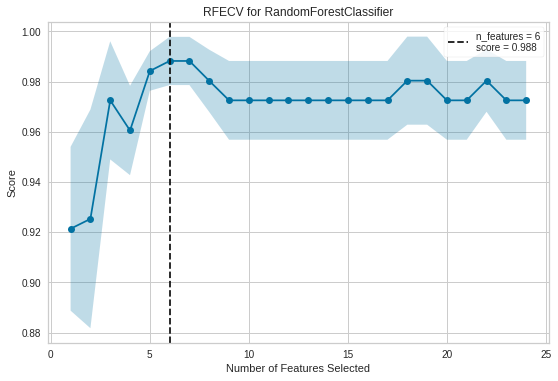

In [ ]:
FS_CLASSIFICATION = rfecv(RandomForestClassifier(), X=x, y=y, min_features_to_select = 2)

The graph shows 6 Features have the most impact on the output and should be selected.

###Correlation

Correlation shows how much connection input features has on each other and how much connection input data has on **output**.

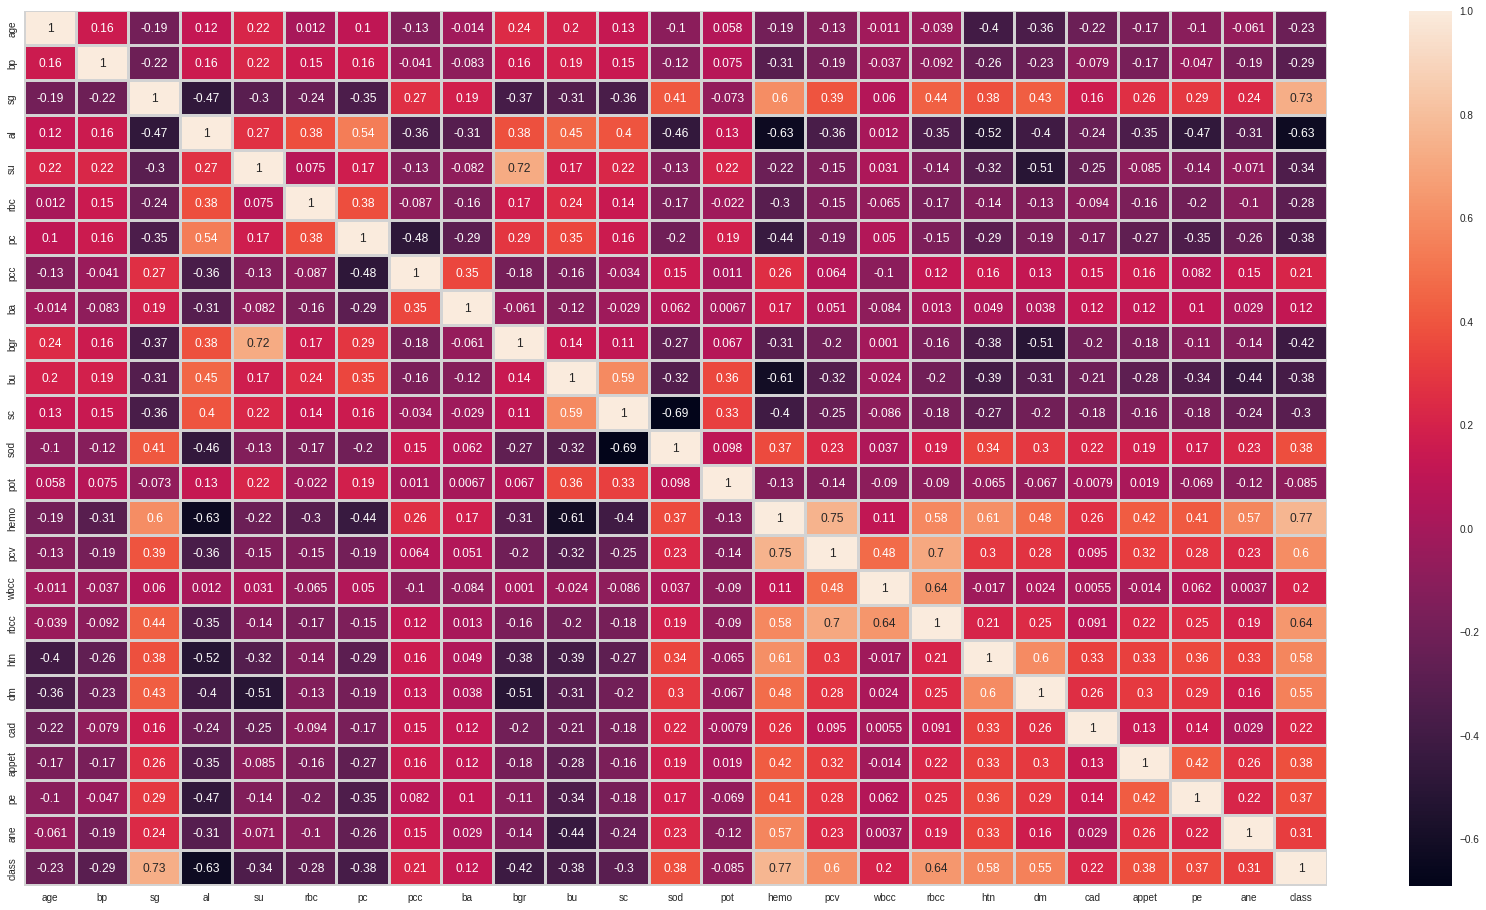

In [ ]:
# heatmap of data
plt.figure(figsize = (26,15))
sns.heatmap(kd.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

There is a strong correlation between 'hemo', 'sg', 'pcv', 'rbcc', 'htn', 'dm', 'al... for furthur undrestanding we will use correlation map.

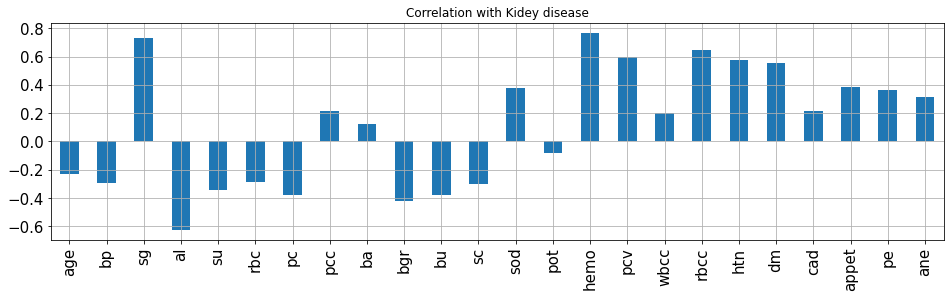

In [ ]:
#Correlation with Response Variable class
x.corrwith(y).plot.bar(
        figsize = (16, 4), title = "Correlation with Kidey disease", fontsize = 15,
        rot = 90, grid = True)

POT has the least effect on output.

###Feature Importance

Use random forest model to rank features and select the best features.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

[0.01932556 0.00107657 0.14736781 0.19274557 0.         0.
 0.         0.         0.         0.02776292 0.02749586 0.05477377
 0.07313728 0.         0.01605521 0.21857779 0.00357191 0.15265822
 0.         0.04756889 0.0028026  0.00443797 0.00756603 0.00307605]


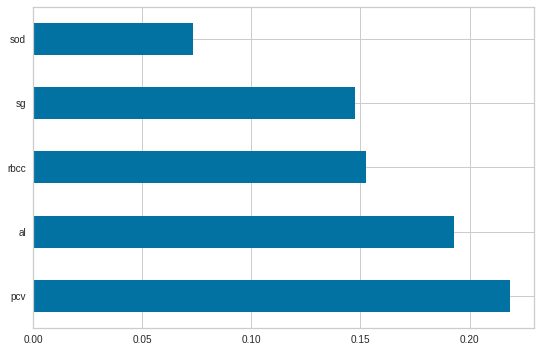

In [ ]:
model = RandomForestClassifier(n_estimators=5)
model.fit(x,y)
print(model.feature_importances_)


#plot graph of feature importances
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

'pcv' has the most effect on output  and 'sod' has the least.

##Feature Selection for Clustering

Multiple methods used for feature selection .In this case we use 3 method to choose best features.

###Filter

This method is the fastest method in choosing features than the other methods because it doent use modeling in choosong features.

####Chi2

This method use chi2 mehtod to evaluate which features are the best ones.

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
selectors = SelectKBest(score_func = chi2, k = 5)
selectors.fit(x, y)
x.columns[selectors.get_support()]

Index(['bgr', 'bu', 'pcv', 'wbcc', 'rbcc'], dtype='object')

we see 'bgr', 'bu', 'pcv', 'wbcc', 'rbcc'are the best .

###Wrapper

This method first choose some features and model them with random forest.
Wrapper methods are more slower than filter methods because they use model to select features.

####Forward Feature Selection

In this method we select one feature and add another features to model them with random forest.

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier

In [ ]:
FS_Forward = SequentialFeatureSelector(estimator=RandomForestClassifier(), n_features_to_select = 4, direction ='forward')
FS_Forward.fit(x, y)
x.columns[FS_Forward.get_support()]

Index(['sg', 'al', 'hemo', 'dm'], dtype='object')

Forward method select 'sg', 'al', 'hemo', 'dm' features by using random forest model.

####Backward Feature Selection

This model use random forest to choose features like forward method but start from the whole fetures then eliminate the unrelated features.

In [ ]:
FS_Backward = SequentialFeatureSelector(estimator=RandomForestClassifier(), n_features_to_select = 4, direction ='backward')
FS_Backward.fit(x, y)
x.columns[FS_Backward.get_support()]

Index(['sg', 'al', 'sc', 'hemo'], dtype='object')

'sg', 'al', 'sc', 'hemo'  are selected.

###Embedding

Embedding is a method that use random forest to rank features and then select the best ones.

In [ ]:
from sklearn.linear_model import RidgeCV, LassoCV

In [ ]:
reg = LassoCV()
reg.fit(x, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(x,y))
coef = pd.Series(reg.coef_, index = x.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables.")

Best alpha using built-in LassoCV: 0.674447
Best score using built-in LassoCV: 0.471052
Lasso picked 5 variables and eliminated the other 19 variables.


In [ ]:
imp_coef = coef.sort_values()
imp_coef

bu      -0.003620
bgr     -0.002182
age     -0.001136
appet    0.000000
cad      0.000000
dm       0.000000
htn      0.000000
rbcc     0.000000
hemo     0.000000
pot      0.000000
sod      0.000000
sc      -0.000000
ba       0.000000
pcc      0.000000
pc      -0.000000
rbc     -0.000000
su       0.000000
al      -0.000000
sg       0.000000
bp      -0.000000
pe       0.000000
ane      0.000000
wbcc     0.000011
pcv      0.013037
dtype: float64

Text(0.5, 1.0, 'Feature importance using Lasso Model')

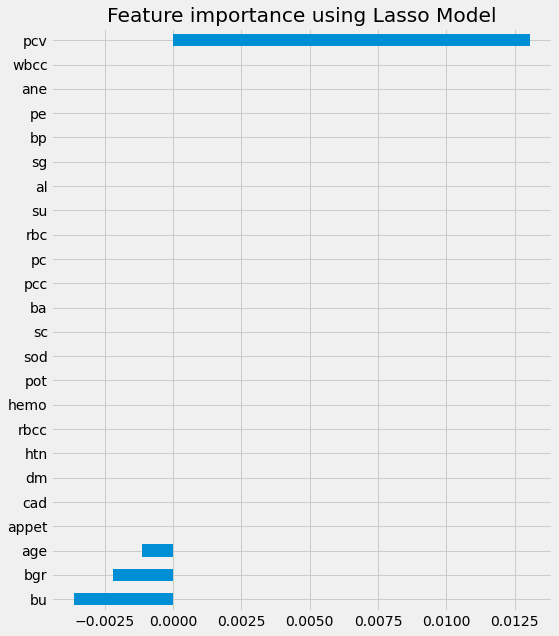

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

As we see we have 5 features 'pcv','age','bgr','bu' as the best features.

# Clustering

In [ ]:
#normalizing Data for clustering
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x= pd.DataFrame(scaler.fit_transform(kd_clean.drop(['class'],axis= 1),),
               columns=['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad','appet', 'pe', 'ane'])

In [ ]:
kd_clean1=kd_clean.drop(['class'],axis=1)
kd_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254 entries, 0 to 399
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     254 non-null    float64
 1   bp      254 non-null    float64
 2   sg      254 non-null    float64
 3   al      254 non-null    float64
 4   su      254 non-null    float64
 5   rbc     254 non-null    int64  
 6   pc      254 non-null    int64  
 7   pcc     254 non-null    int64  
 8   ba      254 non-null    int64  
 9   bgr     254 non-null    float64
 10  bu      254 non-null    float64
 11  sc      254 non-null    float64
 12  sod     254 non-null    float64
 13  pot     254 non-null    float64
 14  hemo    254 non-null    float64
 15  pcv     254 non-null    int64  
 16  wbcc    254 non-null    int64  
 17  rbcc    254 non-null    float64
 18  htn     254 non-null    int64  
 19  dm      254 non-null    int64  
 20  cad     254 non-null    int64  
 21  appet   254 non-null    int64  
 22  pe

## Ploting Number of clusters

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (kd_clean1['pcv'],kd_clean1['age'],s=50,  alpha=0.6)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel('packed cell volume')
ax.set_ylabel('Age')
plt.colorbar(scatter)

In [ ]:
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (kd_clean1['pcv'],kd_clean1['bgr'],s=50,  alpha=0.6)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel('packed cell volume')
ax.set_ylabel('Blood Glocuse random')
plt.colorbar(scatter)


In [ ]:
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (kd_clean1['age'],kd_clean1['bgr'],s=50,  alpha=0.6)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel('age')
ax.set_ylabel('Blood Glocuse random')
plt.colorbar(scatter)

In [ ]:
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (kd_clean1['age'],kd_clean1['bu'],s=50,  alpha=0.6)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel('age')
ax.set_ylabel('Blood urea')
plt.colorbar(scatter)


In [ ]:
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (kd_clean1['pcv'],kd_clean1['bu'],s=50,  alpha=0.6)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel('PAcked Cell Volume')
ax.set_ylabel('Blood urea')
plt.colorbar(scatter)


In [ ]:
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (kd_clean1['bgr'],kd_clean1['bu'],s=50,  alpha=0.6)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel('Blood Glucose Random')
ax.set_ylabel('Blood urea')
plt.colorbar(scatter)

##Hierachichal clustering/ optimist linkage

In [ ]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(kd_clean1)

In [ ]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative

0
0    1
1    1
2    1
3    1
4    1
..  ..
249  1
250  1
251  1
252  1
253  1

[254 rows x 1 columns]

In [ ]:
agglomerative[0].value_counts()

1    184
0     70
Name: 0, dtype: int64

In [ ]:
df = pd.merge(kd_clean1,  agglomerative , left_index=True, right_index=True)
df

age    bp        sg        al   su  rbc  pc  pcc  ba    bgr  ...  pcv  \
0    48.0  80.0  1.020000  1.000000  0.0    0   0    1   1  121.0  ...   44   
4    51.0  80.0  1.010000  2.000000  0.0    0   0    1   1  106.0  ...   35   
5    60.0  90.0  1.015000  3.000000  0.0    0   0    1   1   74.0  ...   39   
13   68.0  70.0  1.019353  0.469828  0.0    0   0    1   1   98.0  ...    0   
16   47.0  70.0  1.015000  2.000000  0.0    0   0    1   1   99.0  ...    0   
..    ...   ...       ...       ...  ...  ...  ..  ...  ..    ...  ...  ...   
247  54.0  90.0  1.025000  1.000000  0.0    0   1    1   1  150.0  ...    0   
250  40.0  80.0  1.025000  0.000000  0.0    0   0    1   1  140.0  ...   48   
251  23.0  80.0  1.025000  0.000000  0.0    0   0    1   1   70.0  ...   52   
252  45.0  80.0  1.025000  0.000000  0.0    0   0    1   1   82.0  ...   46   
253  57.0  80.0  1.025000  0.000000  0.0    0   0    1   1  119.0  ...   42   

      wbcc  rbcc  htn  dm  cad  appet  pe  ane  0  
0     7800   5.2    0   0    1      1   1    1  1  
4     7300   4.6    1   1    1      1   1    1  1  
5     7800   4.4    0   0    1      1   0    1  1  
13       0   0.0    0   0    0      0   0    1  1  
16       0   0.0    1   1    1      1   1    1  1  
..     ...   ...  ...  ..  ...    ...  ..  ... ..  
247      0   0.0    1   1    1      0   0    0  1  
250  10400   4.5    1   1    1      1   1    1  1  
251   9800   5.0    1   1    1      1   1    1  1  
252   9100   4.7    1   1    1      1   1    1  1  
253   6200   6.2    1   1    1      1   1    1  1  

[108 rows x 25 columns]

In [ ]:
df.rename(columns = { 0 : 'cluster'} , inplace = True)

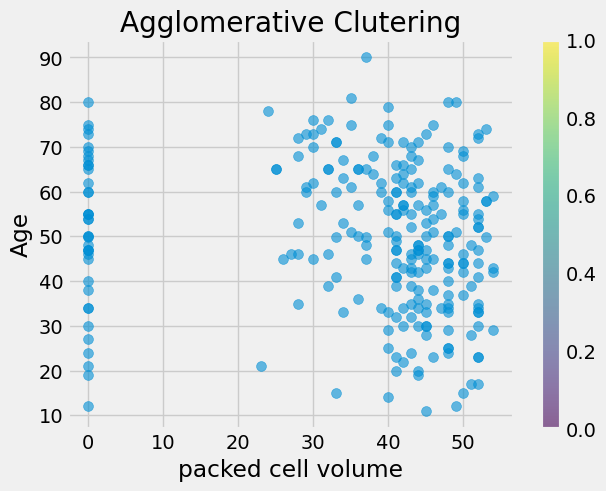

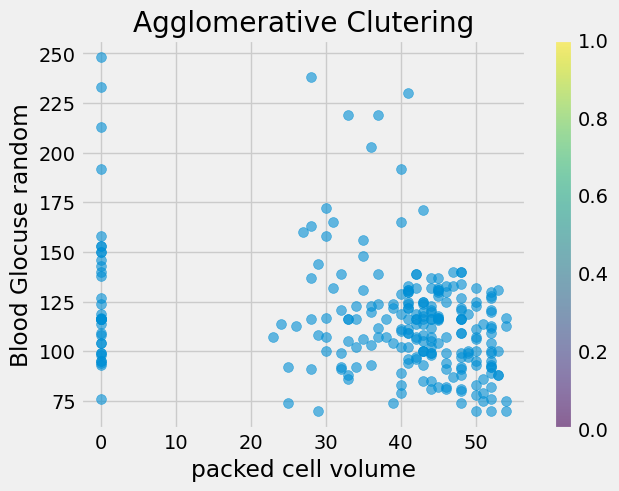

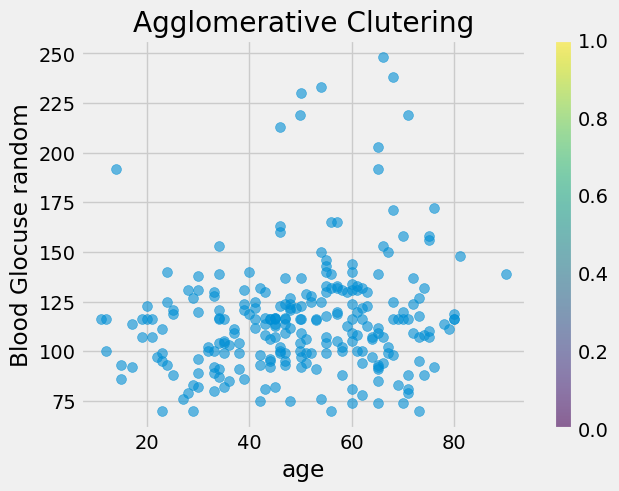

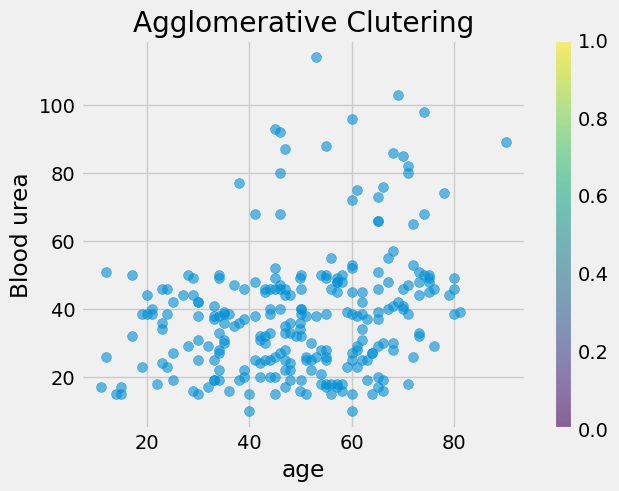

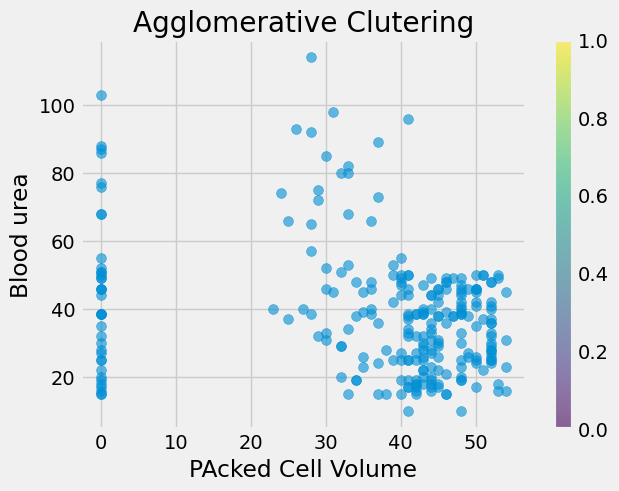

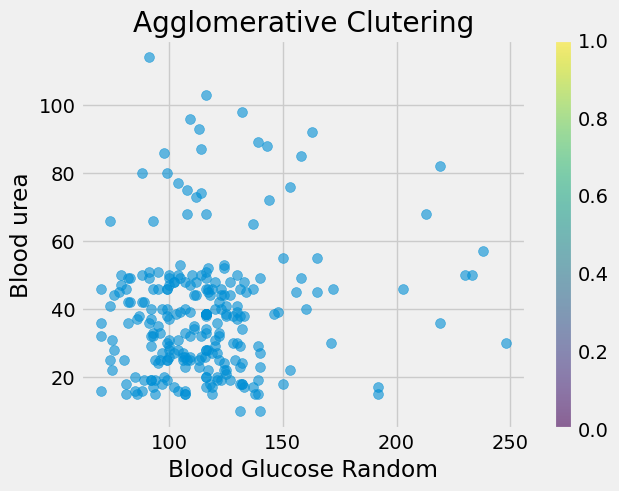

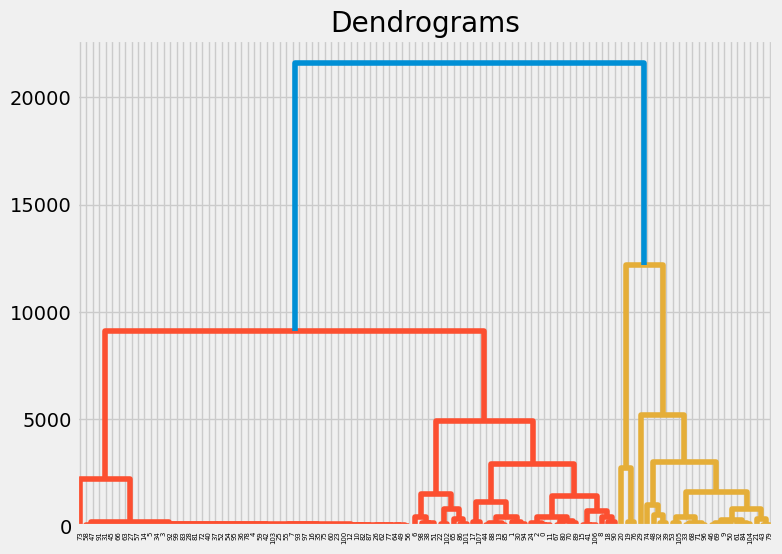

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(8,6))
plt.title("Dendrograms")
dend=shc.dendrogram(shc.linkage(df, method="complete"))
plt.show()

## Hierachichal clustering/pesimist linkage

In [ ]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
clust_labels=model.fit_predict(kd_clean1)

In [ ]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative

0
0    1
1    1
2    1
3    1
4    1
..  ..
249  1
250  1
251  1
252  1
253  1

[254 rows x 1 columns]

In [ ]:
df = pd.merge(kd_clean1,  agglomerative , left_index=True, right_index=True)
df

age    bp        sg        al   su  rbc  pc  pcc  ba    bgr  ...  pcv  \
0    48.0  80.0  1.020000  1.000000  0.0    0   0    1   1  121.0  ...   44   
4    51.0  80.0  1.010000  2.000000  0.0    0   0    1   1  106.0  ...   35   
5    60.0  90.0  1.015000  3.000000  0.0    0   0    1   1   74.0  ...   39   
13   68.0  70.0  1.019353  0.469828  0.0    0   0    1   1   98.0  ...    0   
16   47.0  70.0  1.015000  2.000000  0.0    0   0    1   1   99.0  ...    0   
..    ...   ...       ...       ...  ...  ...  ..  ...  ..    ...  ...  ...   
247  54.0  90.0  1.025000  1.000000  0.0    0   1    1   1  150.0  ...    0   
250  40.0  80.0  1.025000  0.000000  0.0    0   0    1   1  140.0  ...   48   
251  23.0  80.0  1.025000  0.000000  0.0    0   0    1   1   70.0  ...   52   
252  45.0  80.0  1.025000  0.000000  0.0    0   0    1   1   82.0  ...   46   
253  57.0  80.0  1.025000  0.000000  0.0    0   0    1   1  119.0  ...   42   

      wbcc  rbcc  htn  dm  cad  appet  pe  ane  0  
0     7800   5.2    0   0    1      1   1    1  1  
4     7300   4.6    1   1    1      1   1    1  1  
5     7800   4.4    0   0    1      1   0    1  1  
13       0   0.0    0   0    0      0   0    1  1  
16       0   0.0    1   1    1      1   1    1  1  
..     ...   ...  ...  ..  ...    ...  ..  ... ..  
247      0   0.0    1   1    1      0   0    0  1  
250  10400   4.5    1   1    1      1   1    1  1  
251   9800   5.0    1   1    1      1   1    1  1  
252   9100   4.7    1   1    1      1   1    1  1  
253   6200   6.2    1   1    1      1   1    1  1  

[108 rows x 25 columns]

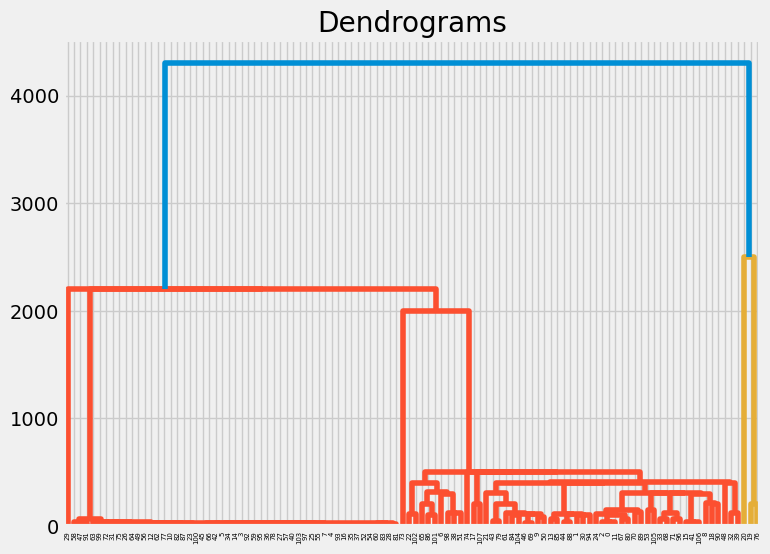

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(8,6))
plt.title("Dendrograms")
dend=shc.dendrogram(shc.linkage(df, method="single"))
plt.show()

## Hierachichal clustering/average linkage

In [ ]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
clust_labels=model.fit_predict(kd_clean1)

In [ ]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative

0
0    0
1    0
2    0
3    0
4    0
..  ..
249  0
250  0
251  0
252  0
253  0

[254 rows x 1 columns]

In [ ]:
agglomerative[0].value_counts()

0    250
1      4
Name: 0, dtype: int64

In [ ]:
df = pd.merge(kd_clean1,  agglomerative , left_index=True, right_index=True)
df

age    bp        sg        al   su  rbc  pc  pcc  ba    bgr  ...  pcv  \
0    48.0  80.0  1.020000  1.000000  0.0    0   0    1   1  121.0  ...   44   
4    51.0  80.0  1.010000  2.000000  0.0    0   0    1   1  106.0  ...   35   
5    60.0  90.0  1.015000  3.000000  0.0    0   0    1   1   74.0  ...   39   
13   68.0  70.0  1.019353  0.469828  0.0    0   0    1   1   98.0  ...    0   
16   47.0  70.0  1.015000  2.000000  0.0    0   0    1   1   99.0  ...    0   
..    ...   ...       ...       ...  ...  ...  ..  ...  ..    ...  ...  ...   
247  54.0  90.0  1.025000  1.000000  0.0    0   1    1   1  150.0  ...    0   
250  40.0  80.0  1.025000  0.000000  0.0    0   0    1   1  140.0  ...   48   
251  23.0  80.0  1.025000  0.000000  0.0    0   0    1   1   70.0  ...   52   
252  45.0  80.0  1.025000  0.000000  0.0    0   0    1   1   82.0  ...   46   
253  57.0  80.0  1.025000  0.000000  0.0    0   0    1   1  119.0  ...   42   

      wbcc  rbcc  htn  dm  cad  appet  pe  ane  0  
0     7800   5.2    0   0    1      1   1    1  0  
4     7300   4.6    1   1    1      1   1    1  0  
5     7800   4.4    0   0    1      1   0    1  0  
13       0   0.0    0   0    0      0   0    1  0  
16       0   0.0    1   1    1      1   1    1  0  
..     ...   ...  ...  ..  ...    ...  ..  ... ..  
247      0   0.0    1   1    1      0   0    0  0  
250  10400   4.5    1   1    1      1   1    1  0  
251   9800   5.0    1   1    1      1   1    1  0  
252   9100   4.7    1   1    1      1   1    1  0  
253   6200   6.2    1   1    1      1   1    1  0  

[108 rows x 25 columns]

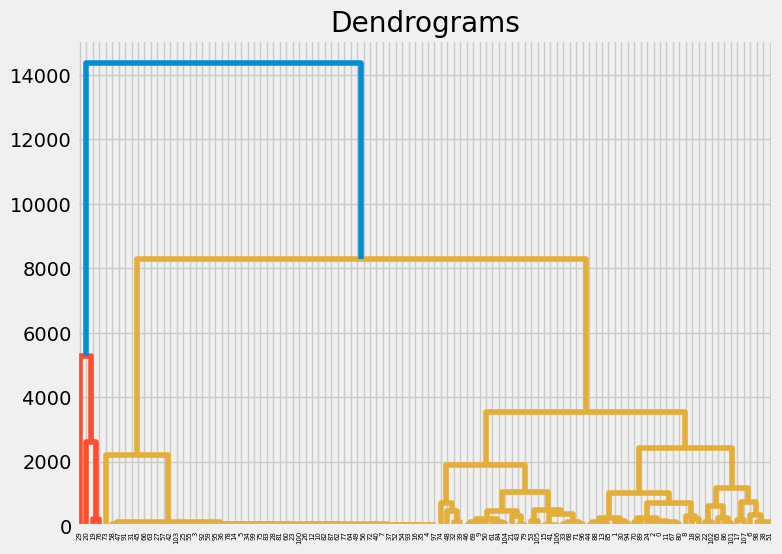

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(8,6))
plt.title("Dendrograms")
dend=shc.dendrogram(shc.linkage(df, method="average"))
plt.show()

## K-means

K-means is a kind of clustering algorithm. It can divide our dataset into K different groups which makes the data points in every group share some common features.

In [ ]:
from sklearn.cluster import KMeans

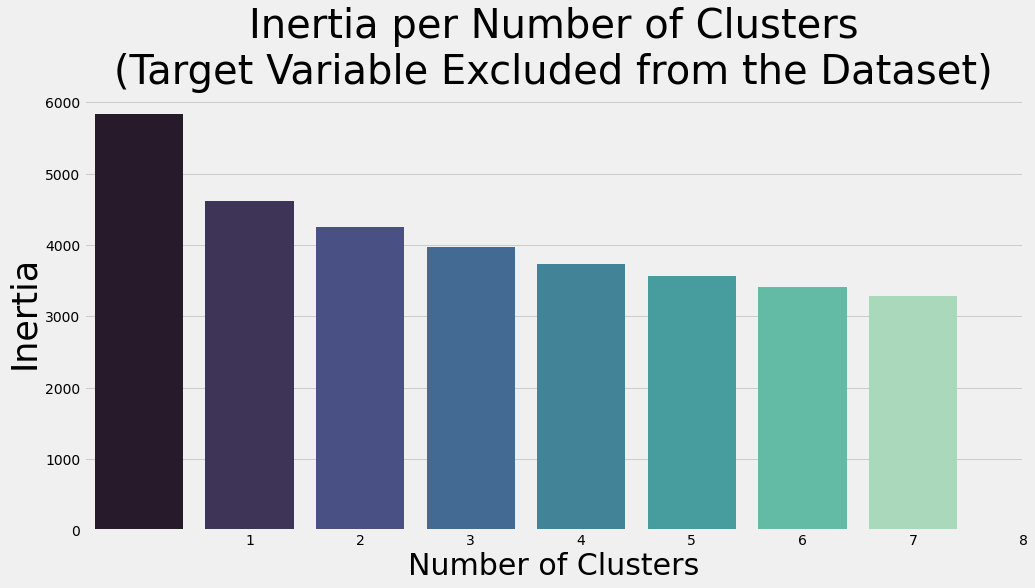

In [ ]:
inertias = []

ks=list(range(1,9))

for k in ks:
    model=KMeans(n_clusters=k)

    model.fit(x)

    inertias.append(model.inertia_)

plt.figure(figsize=(15,7.5))
sns.barplot(ks, inertias, palette='mako')
plt.xlabel('Number of Clusters',fontsize=30)
plt.ylabel('Inertia',fontsize=35)
plt.xticks(ks)
plt.title("Inertia per Number of Clusters\n(Target Variable Excluded from the Dataset)",fontsize=40)
plt.show()

This plot calims that the best score for clustering is 2 like the elbow method in below.

To find the best k to cluster our data we use elbow method.

In [ ]:
#the elbow method
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

    wcss

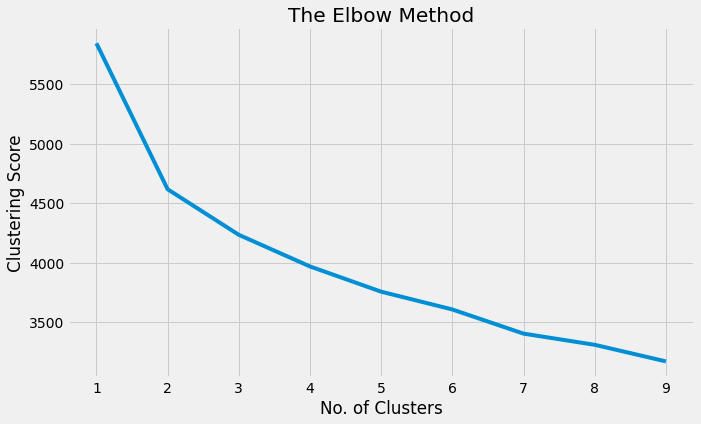

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Clustering Score')
plt.show()

K-MEANS with k=2 .

In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)

In [ ]:
kd['Cluster'] = pd.DataFrame(y_kmeans, columns=['cluster'] )
print('Number of data points in each cluster: \n', kd['Cluster'].value_counts())

Number of data points in each cluster: 
 0.0    165
1.0     89
Name: Cluster, dtype: int64


In [ ]:
kmeans.cluster_centers_

array([[-0.23690255, -0.07671296,  0.4336655 , -0.45910747,  0.        ,
        -0.24152295, -0.2608705 ,  0.17081569,  0.07778761, -0.21407365,
        -0.33902333, -0.47653975,  0.25743498, -0.00969367,  0.5087398 ,
         0.49033075,  0.27285048,  0.50283653,  0.46875533,  0.38982553,
         0.16554862,  0.33263393,  0.3613991 ,  0.24357229],
       [ 0.43920136,  0.14222066, -0.8039866 ,  0.85115429,  0.        ,
         0.44776726,  0.48363633, -0.31668078, -0.14421298,  0.39687812,
         0.62852641,  0.88347256, -0.4772671 ,  0.01797142, -0.9431693 ,
        -0.90904015, -0.5058464 , -0.93222502, -0.86904079, -0.72271026,
        -0.30691598, -0.61668089, -0.67000956, -0.45156661]])

## PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x)

PCA()

In [ ]:
pca_features=list(range(1,25))

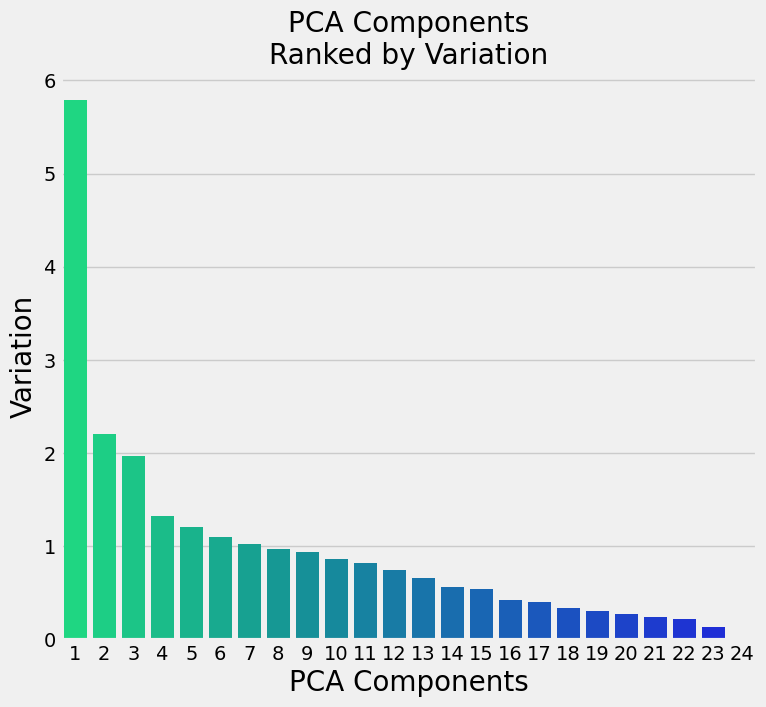

In [ ]:
ax=plt.figure(figsize=(8,7))
sns.barplot(pca_features, pca.explained_variance_,palette="winter_r")
plt.ylabel('Variation',fontsize=20)
plt.xlabel('PCA Components',fontsize=20)
plt.title("PCA Components\nRanked by Variation")
plt.show()

In [ ]:
#theres a distinguishable elbow point in n=2

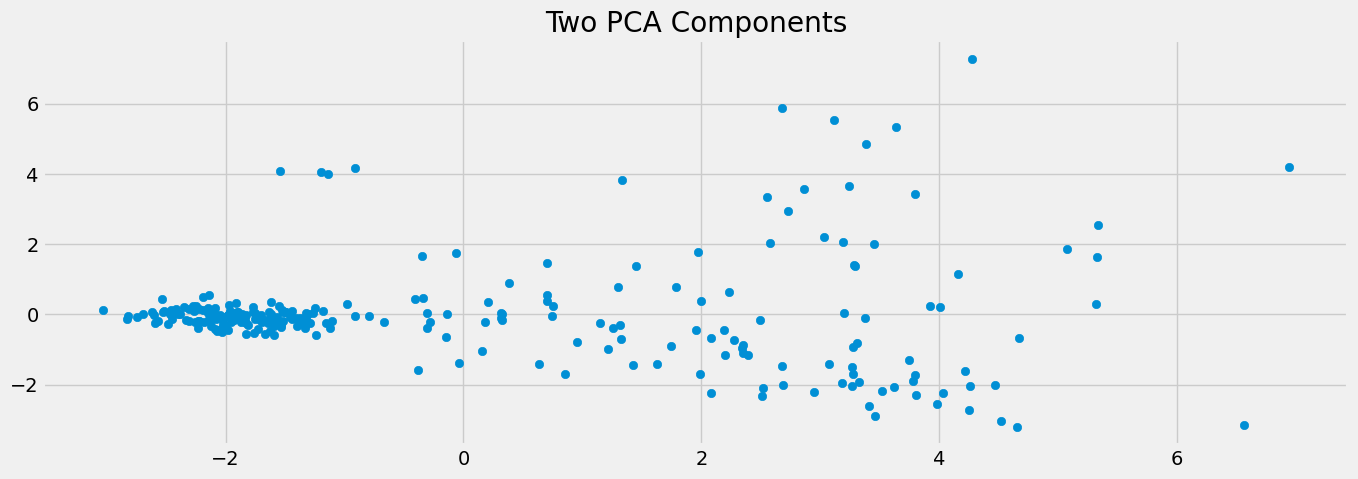

In [ ]:
pca2=PCA(n_components=2)
pca2_data=pca2.fit_transform(x)
plt.figure(figsize=(15,5))
plt.scatter(pca2_data[:,0],pca2_data[:,1],cmap="winter_r")
plt.title('Two PCA Components')
plt.show()

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne_model = TSNE()
tsne_data= tsne_model.fit_transform(x)


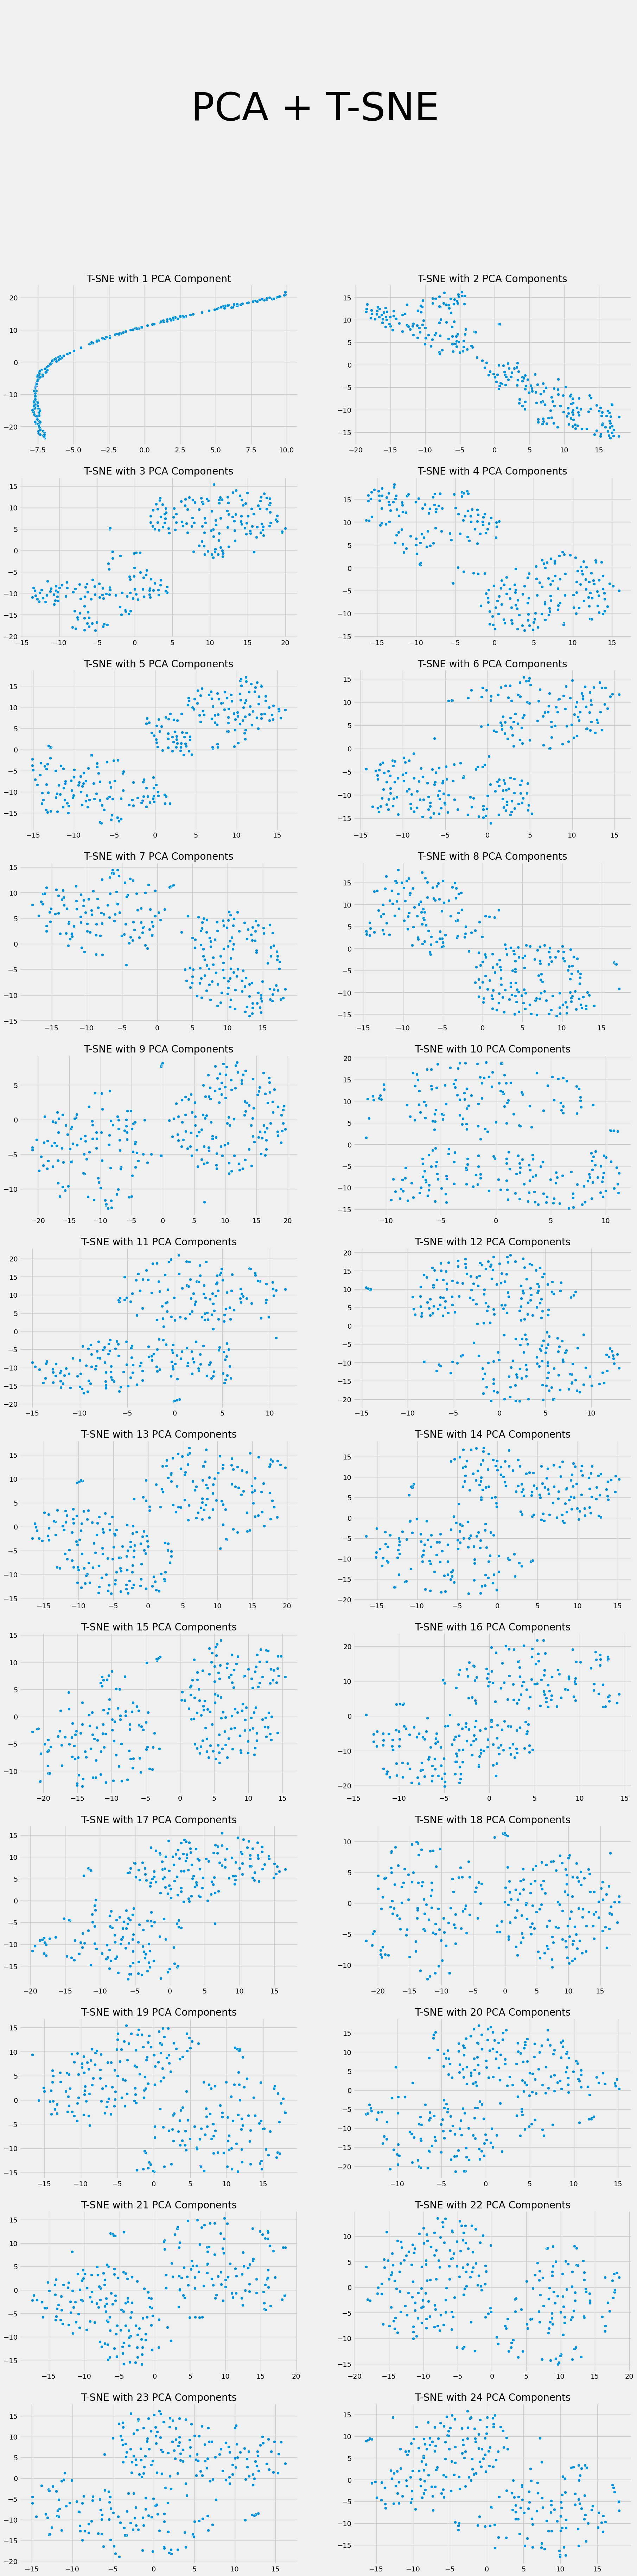

In [ ]:
n_rows, n_cols = (12,2)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(20, 80))
figure.suptitle('\n\nPCA + T-SNE', fontsize=80)

for index in range(24):

    i,j = (index // n_cols), (index % n_cols)

    pca = PCA(n_components=index+1)
    pca_data=pca.fit_transform(x)
    tsne_data= tsne_model.fit_transform(pca_data)
    xs=tsne_data[:,0]
    ys=tsne_data[:,1]
    sns.scatterplot(xs,ys,cmap="winter_r",ax=axes[i,j])
    axes[i,j].set_title("T-SNE with {} PCA Components".format(index+1))
axes[0,0].set_title("T-SNE with 1 PCA Component")
plt.show()
